In [ ]:
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import cv2 as cv

In [ ]:
train_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/train'
test_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
val_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/validation'

filenames = glob.glob(train_path +'/*'+'/*.jpg')
classes = [c.split('/')[-1] for c in glob.glob(train_path +'/*')]
dataframes = []


for f in filenames:
    array = cv.resize(cv.cvtColor(cv.imread(f),cv.COLOR_BGR2GRAY),(60,60)).flatten()
    array = np.append(array,classes.index(f.split('/')[6]))
    dataframes.append(array)
dataframes = np.array(dataframes)

print(dataframes)
print(dataframes.shape)
np.random.shuffle(dataframes)
print("train: ",dataframes)
#########################################################
filenam = glob.glob(val_path +'/*'+'/*.jpg')
clas = [c.split('/')[-1] for c in glob.glob(val_path +'/*')]
datafr = []


for f in filenam:
    array = cv.resize(cv.cvtColor(cv.imread(f),cv.COLOR_BGR2GRAY),(60,60)).flatten()
    array = np.append(array,clas.index(f.split('/')[6]))
    datafr.append(array)
datafr = np.array(datafr)

np.random.shuffle(datafr)
######################################################
filename = glob.glob(test_path +'/*'+'/*.jpg')
classe = [c.split('/')[-1] for c in glob.glob(test_path +'/*')]
dataframe = []


for f in filename:
    array = cv.resize(cv.cvtColor(cv.imread(f),cv.COLOR_BGR2GRAY),(60,60)).flatten()
    array = np.append(array,classe.index(f.split('/')[6]))
    dataframe.append(array)
dataframe = np.array(dataframe)

np.random.shuffle(dataframe)


X_train = dataframes[:, 0:3600]
Y_train = dataframes[:,-1]
X_val = datafr[:, 0:3600]
Y_val = datafr[:,-1]


X_test = dataframe[:, 0:3600]
Y_test = dataframe[:,-1]


# normalize datasets between 0 - 1.0
X_train = X_train/X_train.max()
X_val = X_val/X_val.max()
X_test = X_test/X_test.max()


# one-hot encode for y labels 
y_train = np.zeros((Y_train.size, np.int32(Y_train.max()) + 1))
y_train[np.arange(Y_train.size),Y_train.astype(np.int32)] = 1.0

y_val = np.zeros((Y_val.size, np.int32(Y_val.max()) + 1))
y_val[np.arange(Y_val.size),Y_val.astype(np.int32)] = 1.0

y_test = np.zeros((Y_test.size, np.int32(Y_test.max()) + 1))
y_test[np.arange(Y_test.size),Y_test.astype(np.int32)] = 1.0

print("X_train: ", X_train, X_train.shape)

print("y_train:", y_train, y_train.shape)

print("X_val: ", X_val, X_val.shape)

print("y_val:", y_val, y_val.shape)

print("X_test: ", X_test, X_test.shape)

print("y_test:", y_test, y_test.shape)

In [ ]:
def sigmoid(x, prime = False):
    if (prime == True):
        return x*(1-x)
    return 1./(1.+np.exp(-x))

def tanh(x, prime = False):
    if (prime == True):
        return 1 - tanh(x) * tanh(x)
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def leaky_Relu(x, prime = False):
    if (prime ==True):
        return 0.01 if x < 0 else 1
    return x*0.01 if x < 0 else x

def ReLU(x, prime = False):
    if (prime == True):
        return x>0
    return np.maximum(x, 0)
    

def softmax(x):
    A = np.exp(x)
    return A/A.sum(axis=1,keepdims=True)
    
def negative_loglikelihood(y_pred,y):
    return ((-np.log(y_pred))*y).sum(axis=1).mean()

The input model_shape is a list or array of integers that specifies the number of neurons
in each layer of the model. For example, if there is one hidden layer then, 
model_shape = [#of input neurons, #of first hidden neurons, #of output neurons], 
if there is two hidden layer then, model_shape = [#of input neurons, #of first hidden 
neurons, #of second hidden neurons, #of output neurons], The function creates a list of 
weight matrices, one for each layer in the model (except for the input layer). The 
weight matrix for a given layer has dimensions model_shape[i] x model_shape[i+1], where 
i is the index of the layer. For example, The weight matrix between the input layer and 
the first hidden layer would have size (#of input neurons, #of first hidden neurons), representing the connections between the input units and the hidden units. The function uses a for loop to iterate over the elements of model_shape, starting from the first element and ending at the second-to-last element. For each iteration, the function generates a weight matrix with random values between -1 and 1 using the np.random.uniform function.
So, function converts the list of weight matrices to a numpy array and returns it.

In [ ]:
def init_weights(model_shape):
    weights = list()
    for i in range(model_shape.shape[0]-1):
        weights.append(np.random.uniform(-1,1,size=[model_shape[i],model_shape[i+1]]))
    weights = np.array(weights, dtype=object)
    
    return weights

init_layer function initialize the hidden layer values for a neural network model.
The values are represented as a list of numpy arrays, one array for each layer in the 
model. The input batch_size is an integer that specifies the number of examples in a 
batch of data. The input model_shape is a list or array of integers that specifies 
the number of neurons in each layer of the model. The function initializes an empty 
numpy array for each layer in the model, with dimensions batch_size x model_shape[i], 
where i is the index of the layer. For example, if batch_size is 16 and model_shape is 
[3600, 126, 15], then the array for the first hidden layer would have dimensions 16 x 126.

In [ ]:
def init_layers(batch_size, model_shape):
    h = []
    for i in model_shape:
        h_layer = np.empty((batch_size, i))
        h.append(h_layer)
    return h

In [ ]:
def feed_forward(batch, weights, h):
    h_l = batch
    h[0] = h_l
    for i,weights in enumerate(weights):
        h_l = sigmoid(h_l.dot(weights))
        h[i+1]=h_l
    output = softmax(h[-1])
    return output

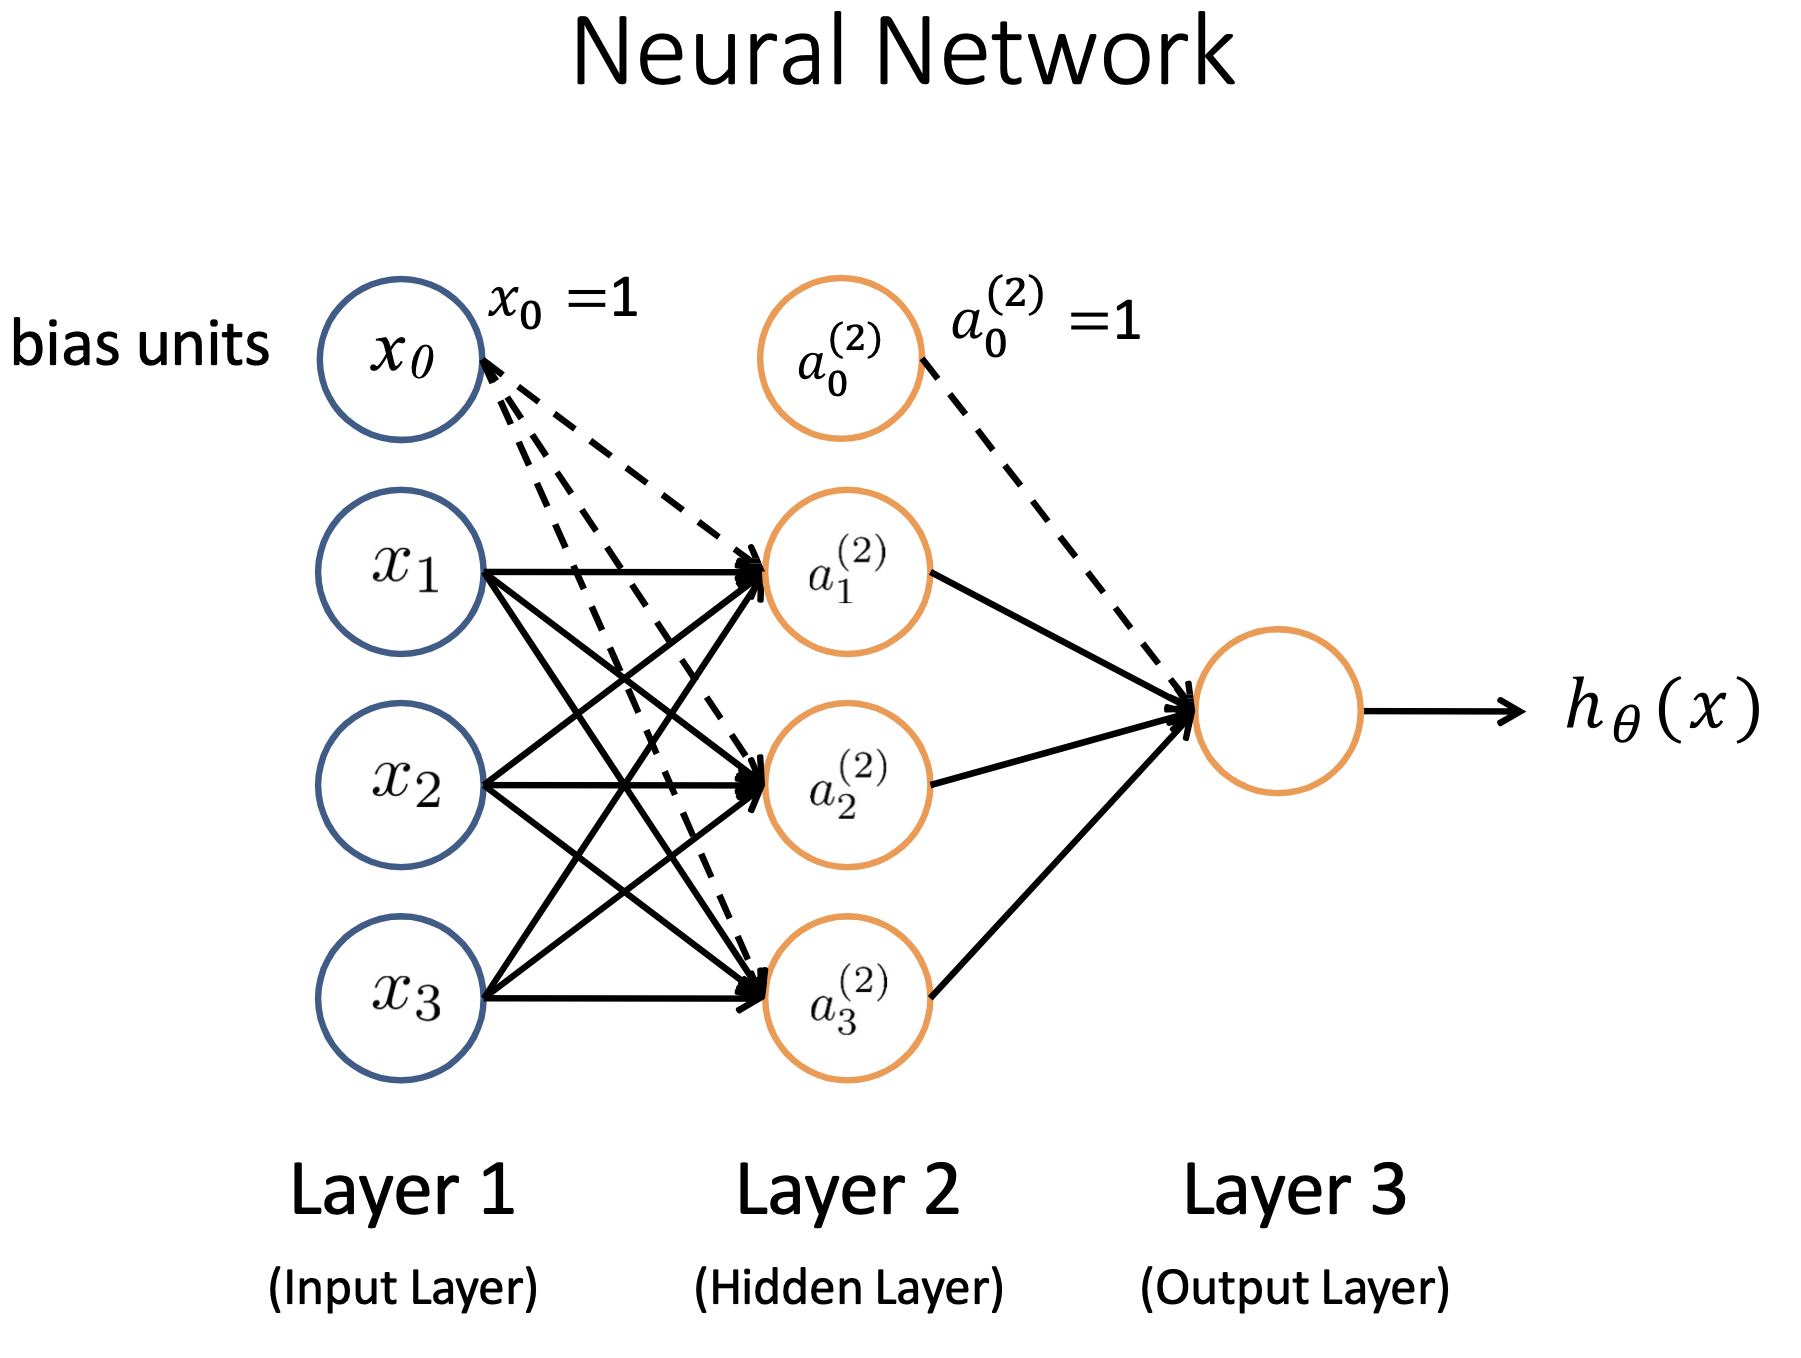

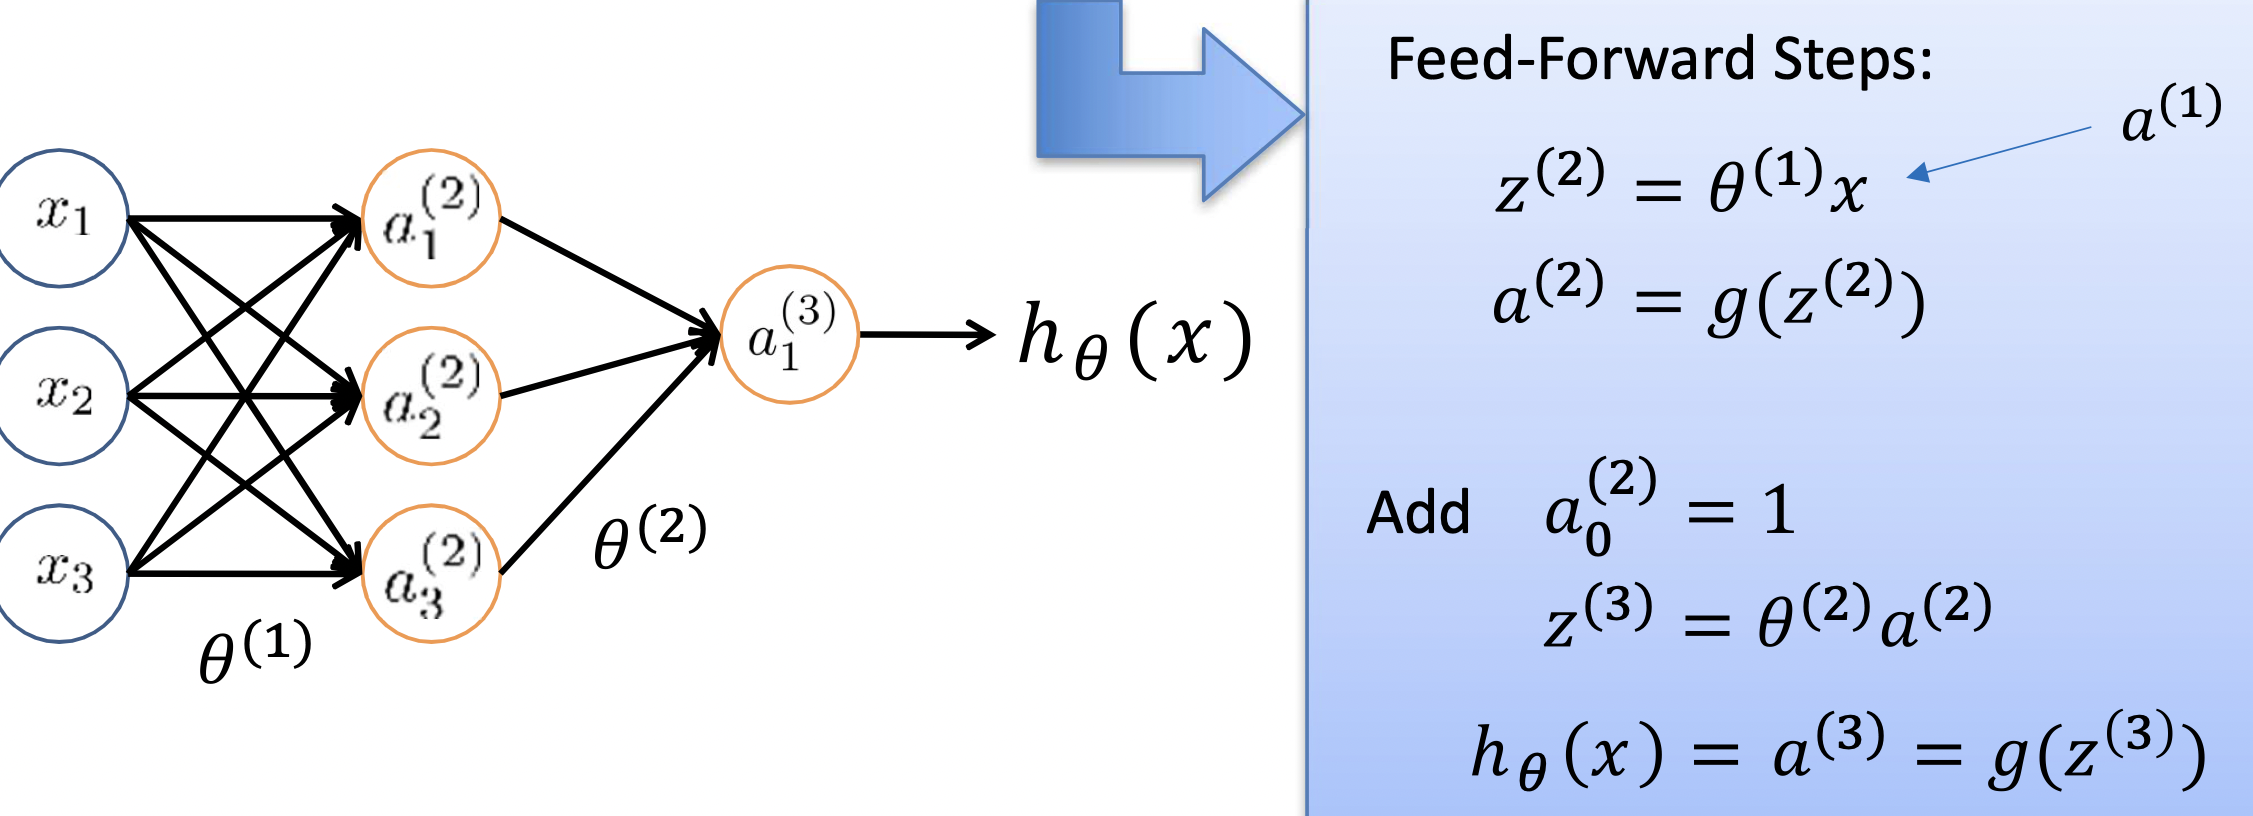

As we have seen in the lecture,

feed_forward function:

We computes the output of a neural network given an input batch and the weights of the model, function takes in three arguments. batch, which is a numpy array representing a batch of input data, weights, which is a list of numpy arrays representing the weights of the model, and h, which is a list of numpy arrays representing the layers of the model. We first sets the input layer (h[0]) to the input batch (batch). It then iterates over the weights of the model using the enumerate function and computes the output of each layer using the sigmoid function. The output of each layer is stored in the corresponding element of the h list then, the function applies the softmax function to the output of the final layer (h[-1]) and returns the resulting array as the output of the model.

back_prop function:

the function first computes the error of the output layer using the difference between the feedforward_output and batch_y arrays, multiplied by the derivative of the sigmoid function applied to the output layer (h[-1]). It then iterates over the weights of the model in reverse order (from the last layer to the first layer) and adjusts the weights using the learning rate, the error of the current layer, and the output of the previous layer (h[-i-1]). The error of each layer is computed using the derivative of the sigmoid function applied to the output of the previous layer (h[-i-1]).


In [ ]:

def back_prop(feedforward_output,batch_size, weights, h, lr, batch_y):
    err = (feedforward_output - batch_y)*sigmoid(h[-1], prime =True)
    for i in range(1, len(weights)+1):
        weights[-i] -= lr*(h[-i-1].T.dot(err))/batch_size
        err = sigmoid(h[-i-1], prime = True)*(err.dot(weights[-i].T))
    return weights, err


In accuracy function, we first compares the predicted labels and true labels element-wise using the == operator and calculates the mean of the resulting array using the mean function. We calculates the mean along the sample axis (axis=1), which means that the accuracy is calculated as the average of the correct predictions made by the model across all samples.



In [ ]:
def accuracy(predicted_y, original_y):  
    return np.all(predicted_y == original_y,axis=1).mean()

classification function:
We first creates an empty array 'cat' of shape (n_samples, y_train.shape[1]), where y_train is the array of true labels for the training set. The cat array will be used to store the categorical representation of the predicted class labels.
Next, function sets the element at the index corresponding to the predicted class label to 1 for each sample using the argmax function and indexing with the np.arange function. The argmax function returns the index of the maximum element along the specified axis (axis=1 in this case), which is the class label with the highest predicted probability.

In [ ]:
def classification(x):  
    cat = np.zeros((x.shape[0],y_train.shape[1]))  
    cat[np.arange(x.shape[0]),x.argmax(axis=1)] = 1
    return cat

predict function :
first it concatenates a column of ones to the input data X using the np.concatenate and np.ones functions, which is a common technique used to include a bias term in the input layer. then, the function initializes the layers of the model using the init_layers function and the input data X and model_shape. The function then uses the feed_forward function to make predictions using the input data and weights, and finally, it returns the predictions using the classification function. we are using this fuction for test dataset.

In [ ]:
def predict(X, weights, model_shape, classification):
    X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
    h = init_layers(X_test.shape[0], model_shape)
    out = feed_forward(X, weights,h)
    return classification(out)


evaluation function:
This function first uses the predict function to make predictions on the input data X using the weights of the model and the classification function. It then returns the accuracy of the predictions using the accuracy function and the true labels Y.

In [ ]:
def evaluation(X, Y, predict, weights, model_shape, classification,accuracy):
    prediction = predict(X,weights, model_shape, classification)
    return accuracy(prediction, Y)

In [ ]:
# H : number of hidden layer
# Nh : number of neurons in a hidden layer
# lr : learning rate
    
def train(X_train, Y_train, X_val, Y_val, H , Nh, batch_size, epochs,lr):
    
    #the reason why we first concatenates a column of ones to the input data X_train 
    #and X_val using the np.concatenate and np.ones functions is that  include a bias 
    #term in the input layers as shown in the neural network picture above
    X_train = np.concatenate((X_train,np.ones((X_train.shape[0],1))),axis=1)
    X_test = np.concatenate((X_val,np.ones((X_val.shape[0],1))),axis=1)
    n_samples = X_train.shape[0]
    
   # early stopping control range
    early_stopping_epochs = 10
    
    # lists contain the training loss/acc and validation loss/acc at each epoch, respectively
    train_loss_list = list()
    train_acc_list = list()
    
    val_loss_list = list()
    val_acc_list = list()

    
    # This array represents the number of neurons in each layer of the model: if Nh = 128 and L=2, then the model will be [3600, 128, 128, 15]
    model_shape = np.array([X_train.shape[1]]+[Nh]*H+[Y_train.shape[1]]) 
    
    weights = init_weights(model_shape)
    
    
    for epoch in range(epochs):
        
        h = init_layers(batch_size, model_shape)
        
        mix = np.random.permutation(n_samples)
        train_loss = 0
        train_acc = 0
        X_batches = np.array_split(X_train[mix],n_samples/batch_size)
        Y_batches = np.array_split(Y_train[mix],n_samples/batch_size)
        
        for batch_x,batch_y in zip(X_batches,Y_batches):
            output = feed_forward(batch_x, weights, h)  
            train_loss += negative_loglikelihood(output,batch_y)
            train_acc += accuracy(classification(output),batch_y)
            weights , err = back_prop(output,batch_size, weights, h, lr, batch_y)
                
                
        train_loss /=len(X_batches)
        train_acc /= len(X_batches)
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)

        avg_loss_train= sum(train_loss_list) / len(train_loss_list)
        avg_acc_train = sum(train_acc_list) / len(train_acc_list)
        
        model_shapeV = np.array([X_val.shape[1]]+[Nh]*L+[Y_val.shape[1]]) 
        hh = init_layers(X_test.shape[0], model_shapeV)
        out = feed_forward(X_test, weights, hh)
        
        val_loss = negative_loglikelihood(out, Y_val)
        val_acc = accuracy(classification(out), Y_val)
        val_loss_list.append(val_loss)
        val_acc_list.append(val_acc)

        avg_loss_val= sum(val_loss_list) / len(val_loss_list)
        avg_acc_val = sum(val_acc_list) / len(val_acc_list)
        if val_acc>avg_acc_val:
            avg_acc_val = sum(val_acc_list) / len(val_acc_list)
        elif (epoch+1) % early_stopping_epochs == 0 and train_acc >= avg_acc_train and epoch+1!=epochs:
            print('Stopped at epoch: {}'.format(epoch+1))
            break
   
        if (epoch%10==0):
            print(f"Epoch {epoch+1}:  loss = {train_loss.round(3)} , acc = {train_acc.round(3)} , avg_acc = {avg_acc_train.round(3)} ,val_loss = {val_loss.round(3)} ,  val_acc = {val_acc.round(3)} ,avg_val = {avg_acc_val.round(3)}  ")
    fig,ax = plt.subplots(1,2,figsize=(15,5))
    #corresponds to the left plot, and it plots the training loss and validation loss
    ax[0].plot(train_loss_list,label="Train loss")
    ax[0].plot(val_loss_list,label="Val loss")
    ax[0].legend()
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")
    ax[0].grid()
    #corresponds to the right plot, and it plots the training accuracy and validation accuracy
    ax[1].plot(train_acc_list,label="Train acc")
    ax[1].plot(val_acc_list,label="Val acc")
    ax[1].legend()
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Accuracy")
    ax[1].grid()
    return weights
 





In [ ]:
# we train our model and get the finalize weight to test our test datasets            
weights = train(X_train, y_train, X_val, y_val, H=2 , Nh=126, batch_size=16, epochs=1050,lr=0.02)
# initilize the model shape according to test dataset
model_shapeT = np.array([X_test.shape[1]]+[128]*2+[y_test.shape[1]]) 

predictions = predict(X_test, weights,model_shapeT, classification)
accuracy = evaluation(X_test, y_test, predict,weights,model_shapeT, classification, accuracy)
print("Test accuracy: ",accuracy)

print("Pred: ",predictions)
# we decode predictions to implement the confusion matrix
decoded_pred = np.argmax(predictions, axis=1)

print("Decod: ",decoded_pred)

cf_matrix = confusion_matrix(Y_test, decoded_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *len(classes), index = [idx for idx in classes], columns = [col for col in classes])
    
# TP,FP,FN and TN values for every class.
num_classes = len(cf_matrix)
TP = [0] * num_classes
FP = [0] * num_classes
FN = [0] * num_classes
TN = [0] * num_classes

# Loop over the classes
for i in range(num_classes):
    # Getting the TP, FP, FN, and TN values for class i
    TP[i] = cf_matrix[i][i]
    FP[i] = sum([cf_matrix[j][i] for j in range(num_classes) if j != i])
    FN[i] = sum([cf_matrix[i][j] for j in range(num_classes) if j != i])
    TN[i] = sum([cf_matrix[j][k] for j in range(num_classes) for k in range(num_classes) if j != i and k != i])
    print('recall ' + classes[i] + ' : '+  str(TP[i]/(TP[i]+FN[i])))
    print('precision ' + classes[i] +  ' : '+ str(TP[i]/(TP[i]+FP[i])))
    print('f1 score ' + classes[i] + ' : '+ str(TP[i]/(TP[i]+(0.5*(FN[i]+FP[i])))))
print('recallF : '+ str(sum(TP)/(sum(TP)+sum(FN))))
print('precisionF : '+ str(sum(TP)/(sum(TP)+sum(FP))))
print('f1 scoreF : '+ str(sum(TP)/(sum(TP)+(0.5*(sum(FN)+sum(FP))))))


print("Test accuracy: ",accuracy)






# Note

Hocam, to see early stop, we need more epoch which is greater than 1000. Since time limitation we couldn't wait being early stop.
Also to determine the number of neurons in a hidden layer, we try respectively 50, 250, 100, 150, 120, 130, 125, 126, 128 and 128 provides us best performance.

# See what happens when batch size is changed

The batch size is a hyperparameter that controls the number of samples processed per gradient update in an epoch. When we train a neural network, we can think of an epoch as a single pass through the entire training dataset. The batch size determines the number of samples that the model will see before updating the model weights.
As, our batch size rate should be between 16 and 128, we try first batch size 128

# output when H=1 , Nh=128, batch_size=128, lr=0.02

Epoch 1:  loss = 2.775 , acc = 0.069 , avg_acc = 0.069 ,val_loss = 2.774 ,  val_acc = 0.067 ,avg_val = 0.067  
 
Epoch 101:  loss = 2.565 , acc = 0.175 , avg_acc = 0.13 ,val_loss = 2.579 ,  val_acc = 0.16 ,avg_val = 0.123  

Epoch 201:  loss = 2.504 , acc = 0.215 , avg_acc = 0.163 ,val_loss = 2.523 ,  val_acc = 0.194 ,avg_val = 0.151  

Epoch 301:  loss = 2.469 , acc = 0.243 , avg_acc = 0.186 ,val_loss = 2.493 ,  val_acc = 0.22 ,avg_val = 0.17  

Epoch 401:  loss = 2.444 , acc = 0.264 , avg_acc = 0.203 ,val_loss = 2.473 ,  val_acc = 0.234 ,avg_val = 0.184  

Epoch 501:  loss = 2.423 , acc = 0.284 , avg_acc = 0.217 ,val_loss = 2.457 ,  val_acc = 0.248 ,avg_val = 0.196  

Epoch 601:  loss = 2.405 , acc = 0.298 , avg_acc = 0.229 ,val_loss = 2.445 ,  val_acc = 0.268 ,avg_val = 0.206  

Epoch 701:  loss = 2.388 , acc = 0.314 , avg_acc = 0.24 ,val_loss = 2.435 ,  val_acc = 0.276 ,avg_val = 0.215  

Epoch 801:  loss = 2.374 , acc = 0.326 , avg_acc = 0.25 ,val_loss = 2.426 ,  val_acc = 0.283 ,avg_val = 0.223  

Epoch 901:  loss = 2.36 , acc = 0.336 , avg_acc = 0.259 ,val_loss = 2.418 ,  val_acc = 0.294 ,avg_val = 0.231  

Epoch 1000:  loss = 2.347 , acc = 0.347 , avg_acc = 0.267 ,val_loss = 2.411 ,  val_acc = 0.303 ,avg_val = 0.238 

Test accuracy:  0.2996666666666667

recall Broccoli : 0.16

precision Broccoli : 0.25

f1 score Broccoli : 0.1951219512195122

recall Capsicum : 0.375

precision Capsicum : 0.3303964757709251

f1 score Capsicum : 0.351288056206089

recall Bottle_Gourd : 0.285

precision Bottle_Gourd : 0.4418604651162791

f1 score Bottle_Gourd : 0.3465045592705167

recall Radish : 0.415

precision Radish : 0.32936507936507936

f1 score Radish : 0.3672566371681416

recall Tomato : 0.425

precision Tomato : 0.22666666666666666

f1 score Tomato : 0.2956521739130435

recall Brinjal : 0.225

precision Brinjal : 0.28662420382165604

f1 score Brinjal : 0.25210084033613445

recall Pumpkin : 0.33

precision Pumpkin : 0.26720647773279355

f1 score Pumpkin : 0.2953020134228188

recall Carrot : 0.22

precision Carrot : 0.2913907284768212

f1 score Carrot : 0.25071225071225073

recall Papaya : 0.305

precision Papaya : 0.40397350993377484

f1 score Papaya : 0.3475783475783476

recall Cabbage : 0.165

precision Cabbage : 0.18232044198895028

f1 score Cabbage : 0.1732283464566929

recall Bitter_Gourd : 0.305

precision Bitter_Gourd : 0.30808080808080807

f1 score Bitter_Gourd : 0.3065326633165829

recall Cauliflower : 0.355

precision Cauliflower : 0.29583333333333334

f1 score Cauliflower : 0.32272727272727275

recall Bean : 0.185

precision Bean : 0.18686868686868688

f1 score Bean : 0.18592964824120603

recall Cucumber : 0.35

precision Cucumber : 0.45751633986928103

f1 score Cucumber : 0.39660056657223797

recall Potato : 0.395

precision Potato : 0.37089201877934275

f1 score Potato : 0.38256658595641646

recallF : 0.2996666666666667

precisionF : 0.2996666666666667

f1 scoreF : 0.2996666666666667

Test accuracy:  0.2996666666666667

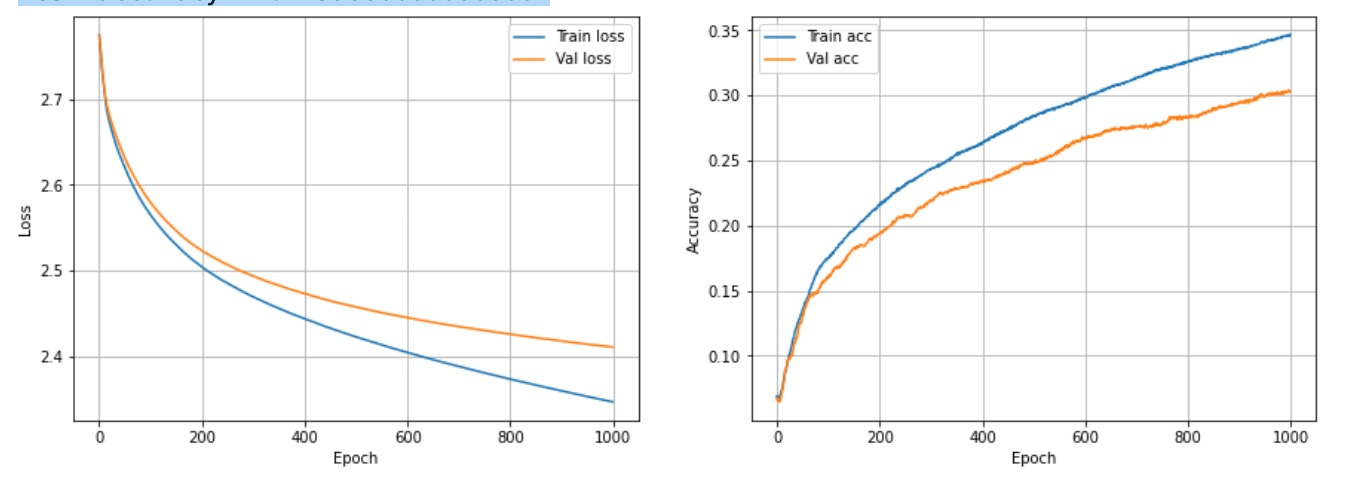

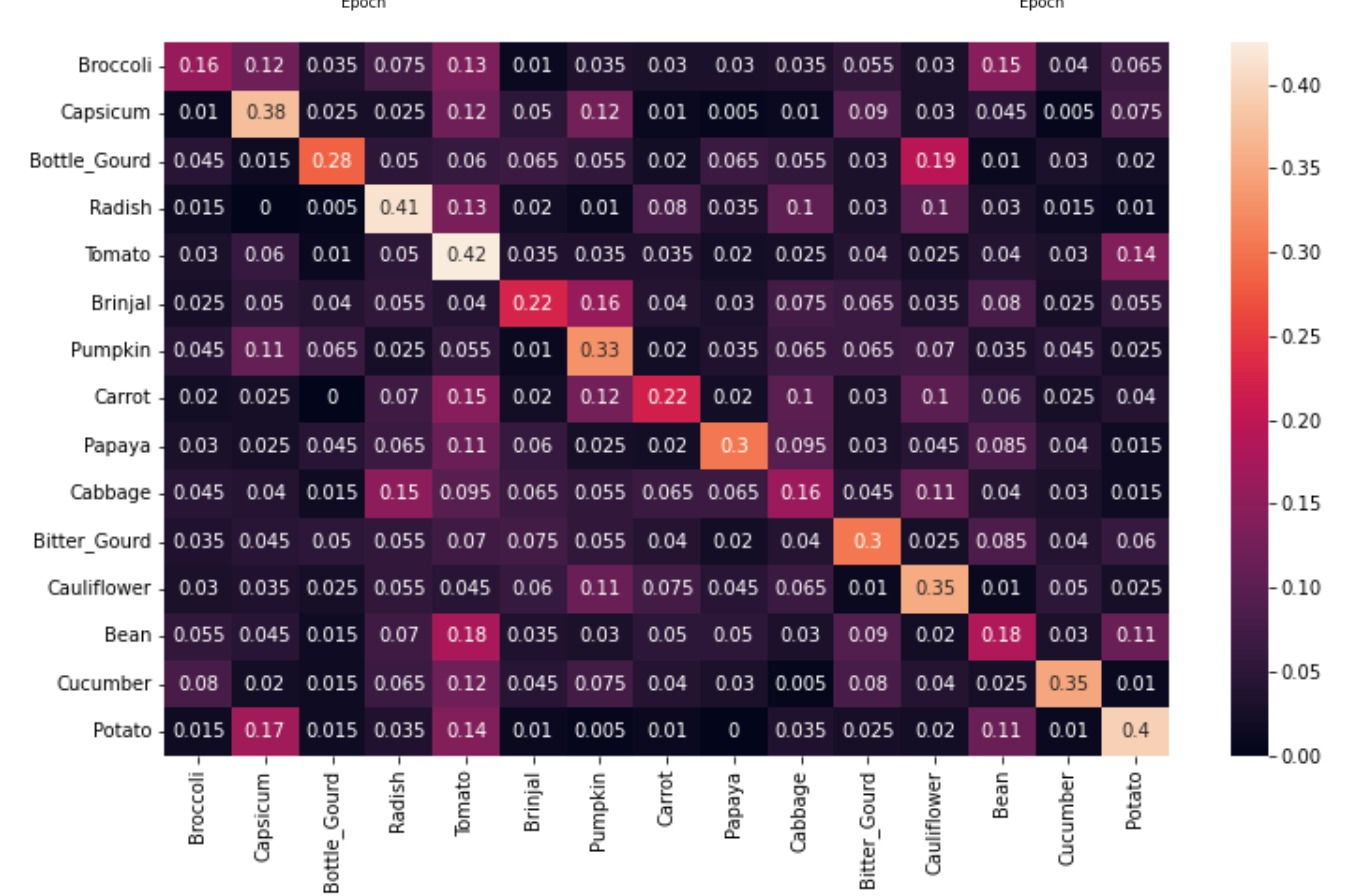

# output when H=1 , Nh=128, batch_size=64, lr=0.02

Epoch 1:  loss = 2.769 , acc = 0.059 , avg_acc = 0.059 ,val_loss = 2.76 ,  val_acc = 0.055 ,avg_val = 0.055  

Epoch 101:  loss = 2.552 , acc = 0.09 , avg_acc = 0.071 ,val_loss = 2.573 ,  val_acc = 0.087 ,avg_val = 0.07  

Epoch 201:  loss = 2.463 , acc = 0.258 , avg_acc = 0.144 ,val_loss = 2.498 ,  val_acc = 0.233 ,avg_val = 0.137  

Epoch 301:  loss = 2.416 , acc = 0.295 , avg_acc = 0.188 ,val_loss = 2.464 ,  val_acc = 0.253 ,avg_val = 0.172  
 
Epoch 401:  loss = 2.383 , acc = 0.322 , avg_acc = 0.218 ,val_loss = 2.441 ,  val_acc = 0.266 ,avg_val = 0.194  

Epoch 501:  loss = 2.355 , acc = 0.348 , avg_acc = 0.242 ,val_loss = 2.424 ,  val_acc = 0.284 ,avg_val = 0.211  

Epoch 601:  loss = 2.331 , acc = 0.367 , avg_acc = 0.261 ,val_loss = 2.41 ,  val_acc = 0.294 ,avg_val = 0.224  

Epoch 701:  loss = 2.309 , acc = 0.385 , avg_acc = 0.277 ,val_loss = 2.399 ,  val_acc = 0.303 ,avg_val = 0.235  

Epoch 801:  loss = 2.29 , acc = 0.401 , avg_acc = 0.292 ,val_loss = 2.389 ,  val_acc = 0.31 ,avg_val = 0.244  
  
Epoch 901:  loss = 2.273 , acc = 0.417 , avg_acc = 0.305 ,val_loss = 2.381 ,  val_acc = 0.318 ,avg_val = 0.252  

Epoch 1000:  loss = 2.258 , acc = 0.433 , avg_acc = 0.317 ,val_loss = 2.374 ,  val_acc = 0.329 ,avg_val = 0.259  

Test accuracy:  0.33666666666666667

recall Broccoli : 0.215

precision Broccoli : 0.23626373626373626

f1 score Broccoli : 0.225130890052356

recall Capsicum : 0.39

precision Capsicum : 0.34210526315789475

f1 score Capsicum : 0.3644859813084112

recall Bottle_Gourd : 0.345

precision Bottle_Gourd : 0.46308724832214765

f1 score Bottle_Gourd : 0.3954154727793696

recall Radish : 0.41

precision Radish : 0.3360655737704918

f1 score Radish : 0.36936936936936937

recall Tomato : 0.415

precision Tomato : 0.24198250728862974

f1 score Tomato : 0.30570902394106814

recall Brinjal : 0.255

precision Brinjal : 0.3805970149253731

f1 score Brinjal : 0.30538922155688625

recall Pumpkin : 0.325

precision Pumpkin : 0.35911602209944754

f1 score Pumpkin : 0.34120734908136485

recall Carrot : 0.345

precision Carrot : 0.375

f1 score Carrot : 0.359375

recall Papaya : 0.355

precision Papaya : 0.5071428571428571

f1 score Papaya : 0.4176470588235294

recall Cabbage : 0.22

precision Cabbage : 0.24444444444444444

f1 score Cabbage : 0.23157894736842105

recall Bitter_Gourd : 0.37

precision Bitter_Gourd : 0.3756345177664975

f1 score Bitter_Gourd : 0.37279596977329976

recall Cauliflower : 0.325

precision Cauliflower : 0.2968036529680365

f1 score Cauliflower : 0.31026252983293556

recall Bean : 0.28

precision Bean : 0.22764227642276422

f1 score Bean : 0.25112107623318386

recall Cucumber : 0.425

precision Cucumber : 0.4292929292929293

f1 score Cucumber : 0.4271356783919598

recall Potato : 0.375

precision Potato : 0.42857142857142855

f1 score Potato : 0.4

recallF : 0.33666666666666667

precisionF : 0.33666666666666667

f1 scoreF : 0.33666666666666667

Test accuracy:  0.33666666666666667

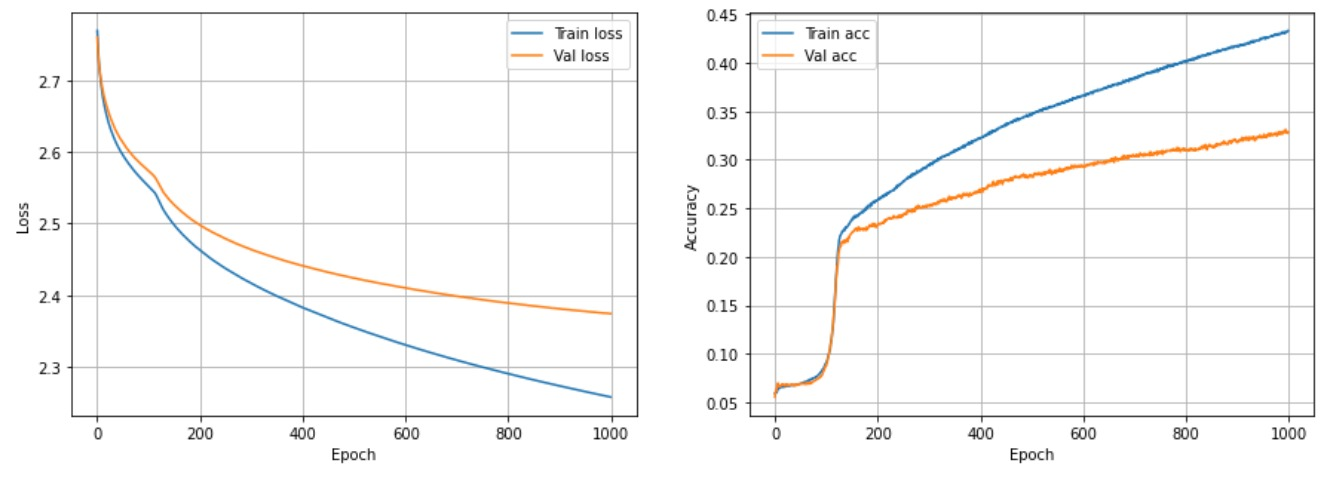

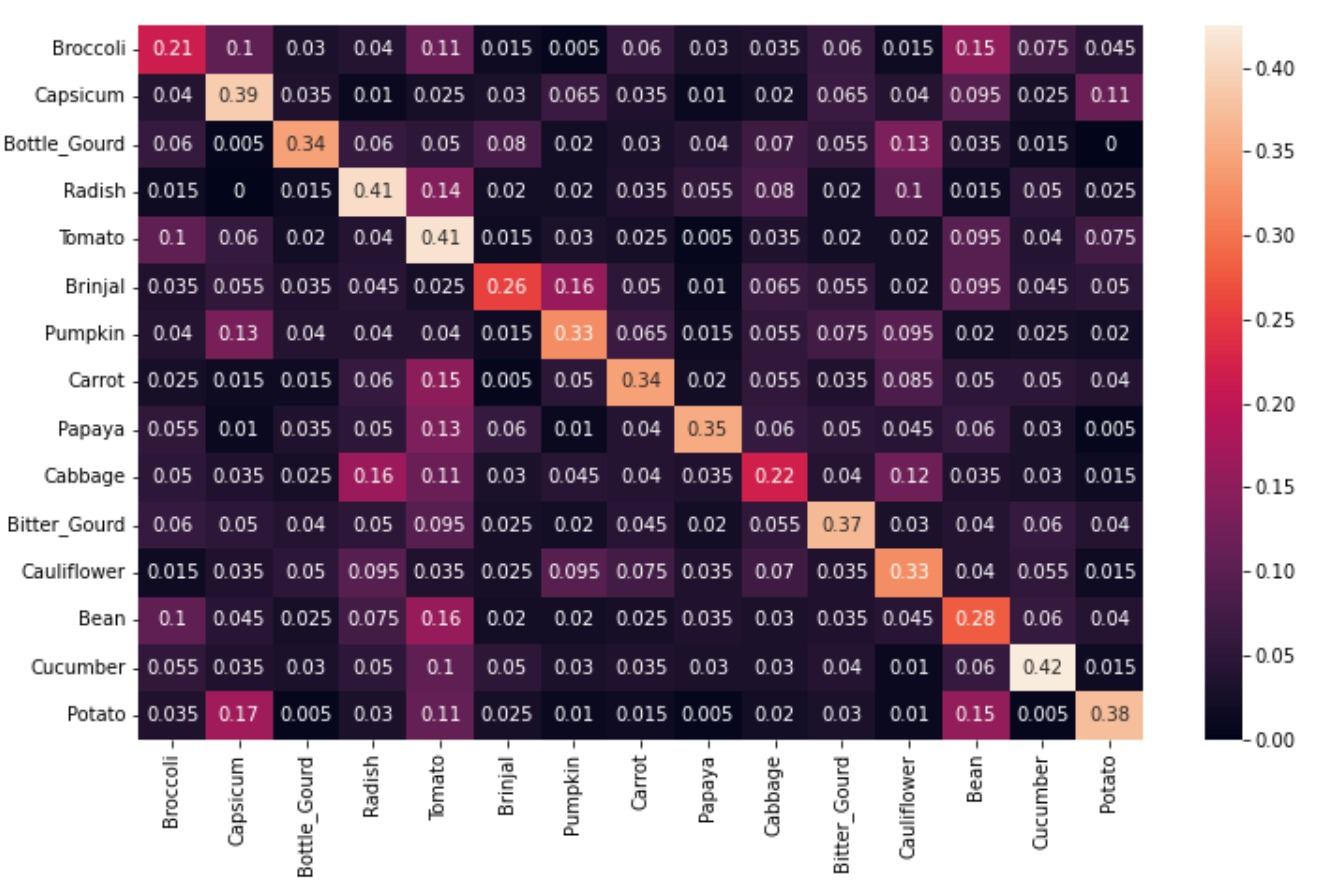

# output when H=1 , Nh=128, batch_size=32, lr=0.02


Epoch 1:  loss = 2.761 , acc = 0.067 , avg_acc = 0.067 ,val_loss = 2.741 ,  val_acc = 0.067 ,avg_val = 0.067  

Epoch 101:  loss = 2.466 , acc = 0.267 , avg_acc = 0.2 ,val_loss = 2.495 ,  val_acc = 0.253 ,avg_val = 0.194  

Epoch 201:  loss = 2.389 , acc = 0.336 , avg_acc = 0.253 ,val_loss = 2.438 ,  val_acc = 0.291 ,avg_val = 0.234  

Epoch 301:  loss = 2.339 , acc = 0.379 , avg_acc = 0.288 ,val_loss = 2.404 ,  val_acc = 0.329 ,avg_val = 0.259  

Epoch 401:  loss = 2.299 , acc = 0.412 , avg_acc = 0.315 ,val_loss = 2.382 ,  val_acc = 0.337 ,avg_val = 0.278  

Epoch 501:  loss = 2.266 , acc = 0.44 , avg_acc = 0.337 ,val_loss = 2.366 ,  val_acc = 0.352 ,avg_val = 0.291  

Epoch 601:  loss = 2.239 , acc = 0.465 , avg_acc = 0.357 ,val_loss = 2.355 ,  val_acc = 0.365 ,avg_val = 0.303  

Epoch 701:  loss = 2.215 , acc = 0.488 , avg_acc = 0.374 ,val_loss = 2.345 ,  val_acc = 0.374 ,avg_val = 0.312  
 
Epoch 801:  loss = 2.194 , acc = 0.509 , avg_acc = 0.389 ,val_loss = 2.339 ,  val_acc = 0.379 ,avg_val = 0.32  

Epoch 901:  loss = 2.175 , acc = 0.528 , avg_acc = 0.404 ,val_loss = 2.334 ,  val_acc = 0.387 ,avg_val = 0.327  

Epoch 996:  loss = 2.16 , acc = 0.544 , avg_acc = 0.417 ,val_loss = 2.33 ,  val_acc = 0.39 ,avg_val = 0.333 

Test accuracy:  0.3943333333333333

recall Broccoli : 0.345

precision Broccoli : 0.3812154696132597

f1 score Broccoli : 0.36220472440944884

recall Capsicum : 0.475

precision Capsicum : 0.4008438818565401

f1 score Capsicum : 0.43478260869565216

recall Bottle_Gourd : 0.425

precision Bottle_Gourd : 0.5483870967741935

f1 score Bottle_Gourd : 0.4788732394366197

recall Radish : 0.485

precision Radish : 0.42358078602620086

f1 score Radish : 0.4522144522144522

recall Tomato : 0.435

precision Tomato : 0.2824675324675325

f1 score Tomato : 0.3425196850393701

recall Brinjal : 0.335

precision Brinjal : 0.3785310734463277

f1 score Brinjal : 0.35543766578249336

recall Pumpkin : 0.335

precision Pumpkin : 0.391812865497076

f1 score Pumpkin : 0.3611859838274933

recall Carrot : 0.45

precision Carrot : 0.4368932038834951

f1 score Carrot : 0.4433497536945813

recall Papaya : 0.48

precision Papaya : 0.5549132947976878

f1 score Papaya : 0.514745308310992

recall Cabbage : 0.235

precision Cabbage : 0.2781065088757396

f1 score Cabbage : 0.25474254742547425

recall Bitter_Gourd : 0.34

precision Bitter_Gourd : 0.4276729559748428

f1 score Bitter_Gourd : 0.3788300835654596

recall Cauliflower : 0.34

precision Cauliflower : 0.3192488262910798

f1 score Cauliflower : 0.32929782082324455

recall Bean : 0.295

precision Bean : 0.30256410256410254

f1 score Bean : 0.29873417721518986

recall Cucumber : 0.465

precision Cucumber : 0.4449760765550239

f1 score Cucumber : 0.4547677261613692

recall Potato : 0.475

precision Potato : 0.43577981651376146

f1 score Potato : 0.45454545454545453

recallF : 0.3943333333333333

precisionF : 0.3943333333333333

f1 scoreF : 0.3943333333333333

Test accuracy:  0.3943333333333333

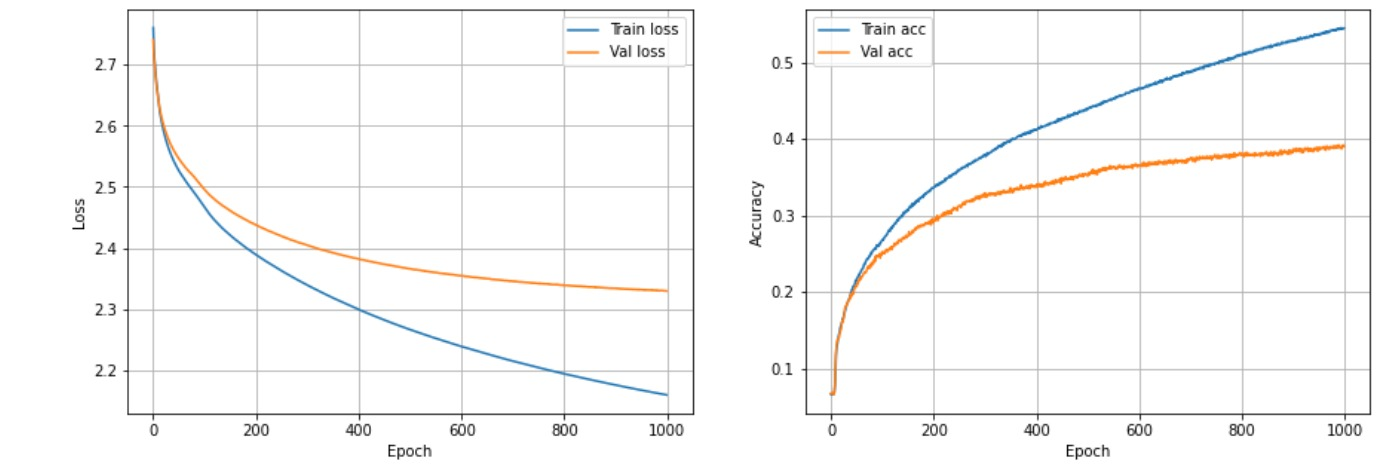

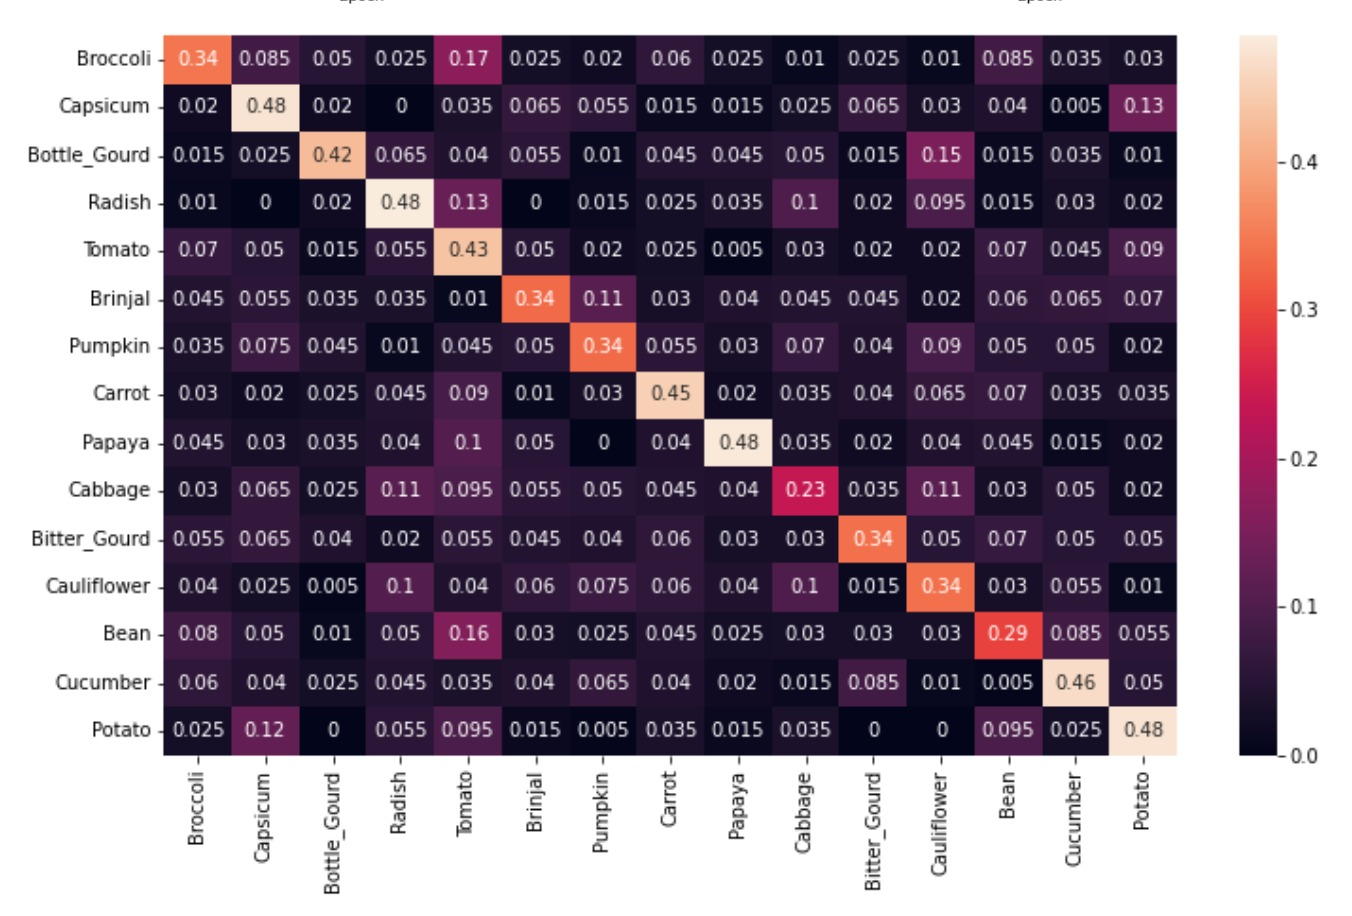

# output when H=1 , Nh=128, batch_size=16, lr=0.02

Epoch 1:  loss = 2.751 , acc = 0.067 , avg_acc = 0.067 ,val_loss = 2.726 ,  val_acc = 0.065 ,avg_val = 0.065  
 
Epoch 101:  loss = 2.4 , acc = 0.335 , avg_acc = 0.26 ,val_loss = 2.451 ,  val_acc = 0.304 ,avg_val = 0.245  

Epoch 201:  loss = 2.3 , acc = 0.406 , avg_acc = 0.317 ,val_loss = 2.389 ,  val_acc = 0.336 ,avg_val = 0.284  

Epoch 301:  loss = 2.238 , acc = 0.464 , avg_acc = 0.357 ,val_loss = 2.361 ,  val_acc = 0.368 ,avg_val = 0.307  

Epoch 401:  loss = 2.192 , acc = 0.507 , avg_acc = 0.389 ,val_loss = 2.345 ,  val_acc = 0.379 ,avg_val = 0.323  

Epoch 501:  loss = 2.157 , acc = 0.542 , avg_acc = 0.416 ,val_loss = 2.336 ,  val_acc = 0.393 ,avg_val = 0.336  
 
Epoch 601:  loss = 2.129 , acc = 0.57 , avg_acc = 0.44 ,val_loss = 2.33 ,  val_acc = 0.404 ,avg_val = 0.346  

Epoch 701:  loss = 2.107 , acc = 0.594 , avg_acc = 0.46 ,val_loss = 2.326 ,  val_acc = 0.413 ,avg_val = 0.355  

Epoch 801:  loss = 2.089 , acc = 0.612 , avg_acc = 0.478 ,val_loss = 2.325 ,  val_acc = 0.415 ,avg_val = 0.363  

Epoch 901:  loss = 2.075 , acc = 0.631 , avg_acc = 0.494 ,val_loss = 2.323 ,  val_acc = 0.419 ,avg_val = 0.369  

Epoch 1000:  loss = 2.063 , acc = 0.644 , avg_acc = 0.508 ,val_loss = 2.323 ,  val_acc = 0.428 ,avg_val = 0.374  

Test accuracy:  0.4166666666666667

recall Broccoli : 0.315

precision Broccoli : 0.3684210526315789

f1 score Broccoli : 0.33962264150943394

recall Capsicum : 0.55

precision Capsicum : 0.3914590747330961

f1 score Capsicum : 0.4573804573804574

recall Bottle_Gourd : 0.595

precision Bottle_Gourd : 0.5748792270531401

f1 score Bottle_Gourd : 0.5847665847665847

recall Radish : 0.48

precision Radish : 0.4549763033175355

f1 score Radish : 0.46715328467153283

recall Tomato : 0.39

precision Tomato : 0.25573770491803277

f1 score Tomato : 0.3089108910891089

recall Brinjal : 0.37

precision Brinjal : 0.39572192513368987

f1 score Brinjal : 0.38242894056847543

recall Pumpkin : 0.355

precision Pumpkin : 0.39226519337016574

f1 score Pumpkin : 0.37270341207349084

recall Carrot : 0.5

precision Carrot : 0.47393364928909953

f1 score Carrot : 0.48661800486618007

recall Papaya : 0.475

precision Papaya : 0.5523255813953488

f1 score Papaya : 0.510752688172043

recall Cabbage : 0.285

precision Cabbage : 0.3131868131868132

f1 score Cabbage : 0.29842931937172773

recall Bitter_Gourd : 0.345

precision Bitter_Gourd : 0.4394904458598726

f1 score Bitter_Gourd : 0.3865546218487395

recall Cauliflower : 0.345

precision Cauliflower : 0.38764044943820225

f1 score Cauliflower : 0.36507936507936506

recall Bean : 0.315

precision Bean : 0.3684210526315789

f1 score Bean : 0.33962264150943394

recall Cucumber : 0.46

precision Cucumber : 0.5227272727272727

f1 score Cucumber : 0.48936170212765956

recall Potato : 0.47

precision Potato : 0.44761904761904764

f1 score Potato : 0.4585365853658537

recallF : 0.4166666666666667

precisionF : 0.4166666666666667

f1 scoreF : 0.4166666666666667

Test accuracy:  0.4166666666666667

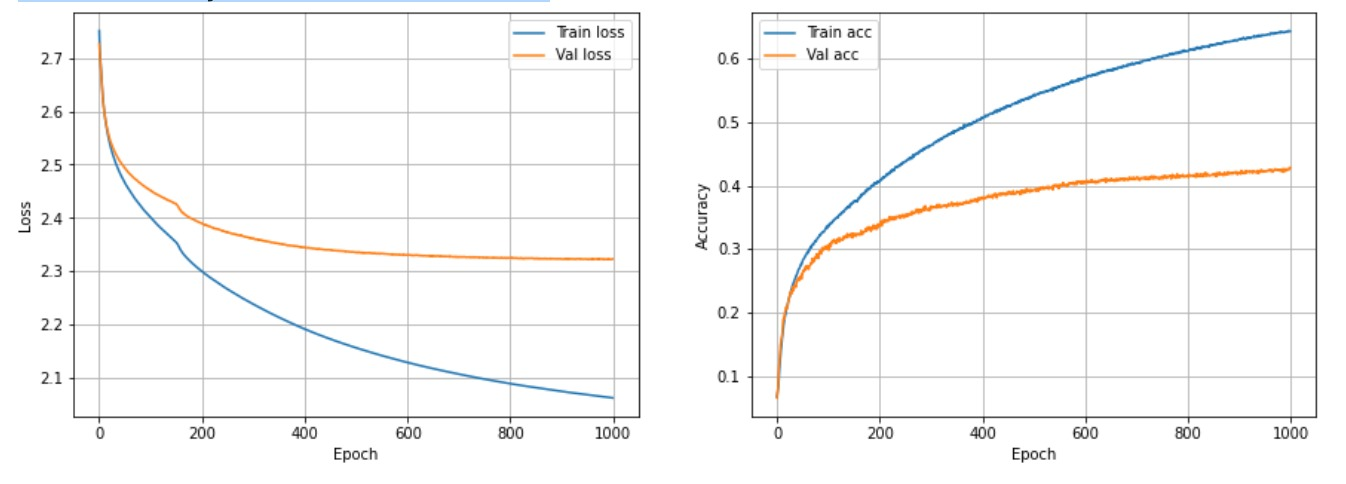

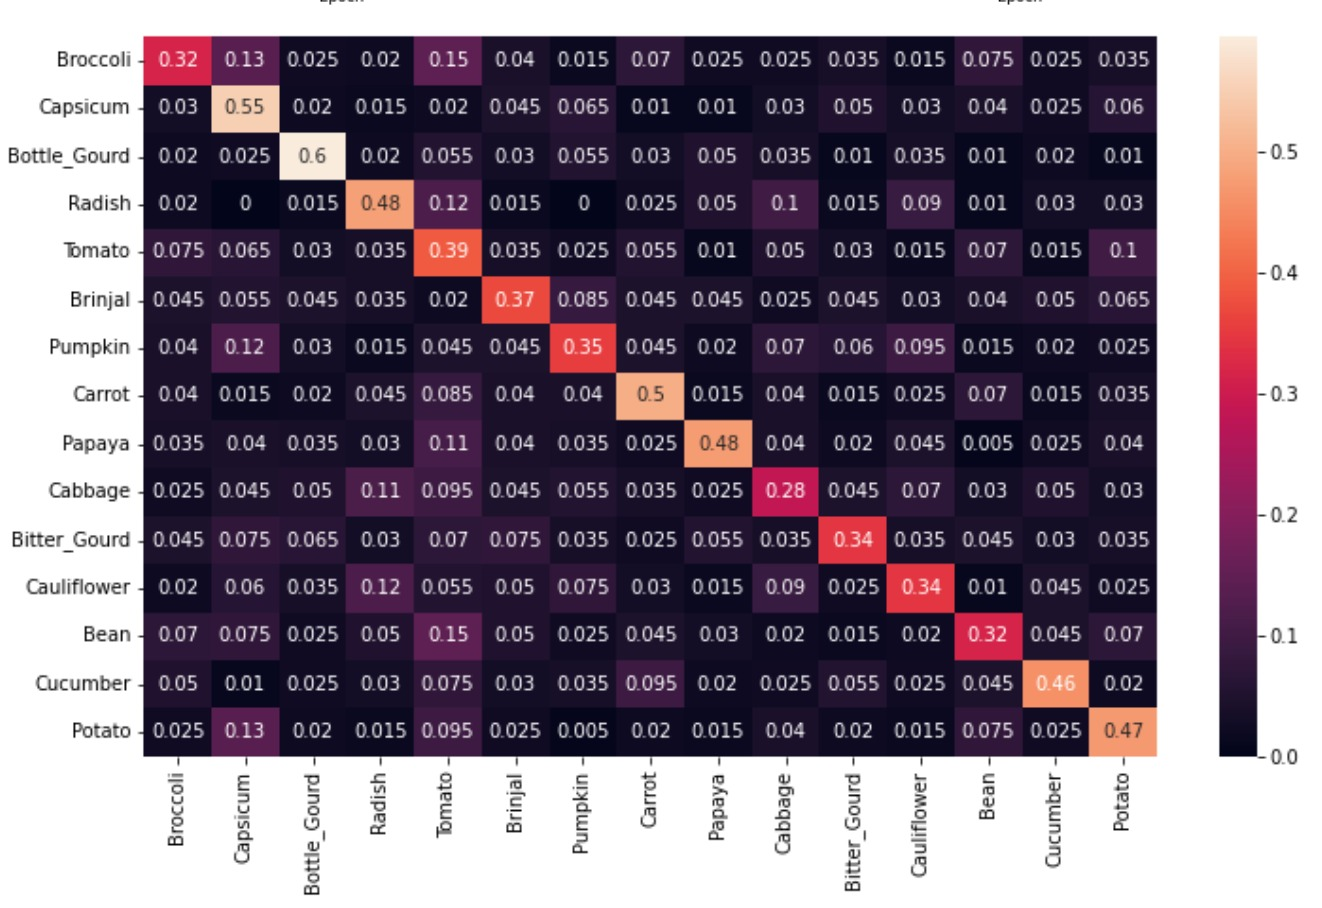

# Result of changing batch size
When we examine the results, we see that larger batch size can train slower and smaller batch sizes can train faster also provides good test performance. That's why we fixed batch sized to 16 to evaluate other parameters properly.

# Let's see what happens when we change learning rate (lr)
The learning rate is a hyperparameter that determines the step size at which the optimizer makes updates to the model weights. It is an important factor in the training process because it controls how fast or slow the model learns.

# output when H=1 , Nh=128, batch_size=16, lr=0.01


Epoch 1:  loss = 2.762 , acc = 0.071 , avg_acc = 0.071 ,val_loss = 2.748 ,  val_acc = 0.065 ,avg_val = 0.065  
Epoch 11:  loss = 2.63 , acc = 0.141 , avg_acc = 0.11 ,val_loss = 2.634 ,  val_acc = 0.129 ,avg_val = 0.103  
Epoch 21:  loss = 2.583 , acc = 0.17 , avg_acc = 0.133 ,val_loss = 2.591 ,  val_acc = 0.161 ,avg_val = 0.124  
Epoch 31:  loss = 2.552 , acc = 0.191 , avg_acc = 0.149 ,val_loss = 2.563 ,  val_acc = 0.176 ,avg_val = 0.138  
Epoch 41:  loss = 2.53 , acc = 0.209 , avg_acc = 0.162 ,val_loss = 2.543 ,  val_acc = 0.198 ,avg_val = 0.15  
Epoch 51:  loss = 2.512 , acc = 0.224 , avg_acc = 0.173 ,val_loss = 2.528 ,  val_acc = 0.208 ,avg_val = 0.161  
Epoch 61:  loss = 2.497 , acc = 0.234 , avg_acc = 0.182 ,val_loss = 2.515 ,  val_acc = 0.225 ,avg_val = 0.17  
Epoch 71:  loss = 2.484 , acc = 0.246 , avg_acc = 0.19 ,val_loss = 2.504 ,  val_acc = 0.23 ,avg_val = 0.178  
Epoch 81:  loss = 2.472 , acc = 0.257 , avg_acc = 0.198 ,val_loss = 2.495 ,  val_acc = 0.24 ,avg_val = 0.185  
Epoch 91:  loss = 2.461 , acc = 0.267 , avg_acc = 0.205 ,val_loss = 2.486 ,  val_acc = 0.249 ,avg_val = 0.192  
Epoch 101:  loss = 2.452 , acc = 0.275 , avg_acc = 0.211 ,val_loss = 2.478 ,  val_acc = 0.259 ,avg_val = 0.198  
Epoch 111:  loss = 2.442 , acc = 0.282 , avg_acc = 0.217 ,val_loss = 2.471 ,  val_acc = 0.258 ,avg_val = 0.203  
Epoch 121:  loss = 2.434 , acc = 0.289 , avg_acc = 0.223 ,val_loss = 2.465 ,  val_acc = 0.263 ,avg_val = 0.208  
Epoch 131:  loss = 2.426 , acc = 0.295 , avg_acc = 0.228 ,val_loss = 2.459 ,  val_acc = 0.271 ,avg_val = 0.212  
Epoch 141:  loss = 2.418 , acc = 0.302 , avg_acc = 0.233 ,val_loss = 2.453 ,  val_acc = 0.271 ,avg_val = 0.217  
Epoch 151:  loss = 2.411 , acc = 0.31 , avg_acc = 0.238 ,val_loss = 2.448 ,  val_acc = 0.273 ,avg_val = 0.22  
Epoch 161:  loss = 2.404 , acc = 0.316 , avg_acc = 0.243 ,val_loss = 2.443 ,  val_acc = 0.28 ,avg_val = 0.224  
Epoch 171:  loss = 2.397 , acc = 0.322 , avg_acc = 0.247 ,val_loss = 2.438 ,  val_acc = 0.282 ,avg_val = 0.227  
Epoch 181:  loss = 2.391 , acc = 0.326 , avg_acc = 0.252 ,val_loss = 2.434 ,  val_acc = 0.287 ,avg_val = 0.23  
Epoch 191:  loss = 2.385 , acc = 0.331 , avg_acc = 0.256 ,val_loss = 2.43 ,  val_acc = 0.294 ,avg_val = 0.234  
Epoch 201:  loss = 2.379 , acc = 0.334 , avg_acc = 0.259 ,val_loss = 2.427 ,  val_acc = 0.298 ,avg_val = 0.237  
Epoch 211:  loss = 2.374 , acc = 0.339 , avg_acc = 0.263 ,val_loss = 2.423 ,  val_acc = 0.302 ,avg_val = 0.24  
Epoch 221:  loss = 2.368 , acc = 0.344 , avg_acc = 0.267 ,val_loss = 2.419 ,  val_acc = 0.303 ,avg_val = 0.243  
Epoch 231:  loss = 2.363 , acc = 0.345 , avg_acc = 0.27 ,val_loss = 2.417 ,  val_acc = 0.309 ,avg_val = 0.245  
Epoch 241:  loss = 2.358 , acc = 0.348 , avg_acc = 0.273 ,val_loss = 2.413 ,  val_acc = 0.313 ,avg_val = 0.248  
Epoch 251:  loss = 2.353 , acc = 0.354 , avg_acc = 0.276 ,val_loss = 2.411 ,  val_acc = 0.315 ,avg_val = 0.251  
Epoch 261:  loss = 2.348 , acc = 0.356 , avg_acc = 0.279 ,val_loss = 2.407 ,  val_acc = 0.316 ,avg_val = 0.253  
Epoch 271:  loss = 2.343 , acc = 0.36 , avg_acc = 0.282 ,val_loss = 2.405 ,  val_acc = 0.317 ,avg_val = 0.255  
Epoch 281:  loss = 2.339 , acc = 0.364 , avg_acc = 0.285 ,val_loss = 2.402 ,  val_acc = 0.32 ,avg_val = 0.258  
Epoch 291:  loss = 2.334 , acc = 0.367 , avg_acc = 0.288 ,val_loss = 2.399 ,  val_acc = 0.321 ,avg_val = 0.26  
Epoch 301:  loss = 2.33 , acc = 0.372 , avg_acc = 0.29 ,val_loss = 2.397 ,  val_acc = 0.322 ,avg_val = 0.262  
Epoch 311:  loss = 2.325 , acc = 0.375 , avg_acc = 0.293 ,val_loss = 2.395 ,  val_acc = 0.326 ,avg_val = 0.264  
Epoch 321:  loss = 2.321 , acc = 0.379 , avg_acc = 0.296 ,val_loss = 2.393 ,  val_acc = 0.323 ,avg_val = 0.266  
Epoch 331:  loss = 2.317 , acc = 0.379 , avg_acc = 0.298 ,val_loss = 2.391 ,  val_acc = 0.327 ,avg_val = 0.268  
Epoch 341:  loss = 2.313 , acc = 0.385 , avg_acc = 0.301 ,val_loss = 2.389 ,  val_acc = 0.327 ,avg_val = 0.269  
Epoch 351:  loss = 2.309 , acc = 0.388 , avg_acc = 0.303 ,val_loss = 2.386 ,  val_acc = 0.33 ,avg_val = 0.271  
Epoch 361:  loss = 2.305 , acc = 0.39 , avg_acc = 0.306 ,val_loss = 2.384 ,  val_acc = 0.329 ,avg_val = 0.273  
Epoch 371:  loss = 2.301 , acc = 0.394 , avg_acc = 0.308 ,val_loss = 2.383 ,  val_acc = 0.332 ,avg_val = 0.274  
Epoch 381:  loss = 2.298 , acc = 0.396 , avg_acc = 0.31 ,val_loss = 2.381 ,  val_acc = 0.332 ,avg_val = 0.276  
Epoch 391:  loss = 2.294 , acc = 0.401 , avg_acc = 0.312 ,val_loss = 2.379 ,  val_acc = 0.334 ,avg_val = 0.277  
Epoch 401:  loss = 2.291 , acc = 0.403 , avg_acc = 0.315 ,val_loss = 2.377 ,  val_acc = 0.339 ,avg_val = 0.279  
Epoch 411:  loss = 2.287 , acc = 0.407 , avg_acc = 0.317 ,val_loss = 2.375 ,  val_acc = 0.339 ,avg_val = 0.28  
Epoch 421:  loss = 2.284 , acc = 0.41 , avg_acc = 0.319 ,val_loss = 2.374 ,  val_acc = 0.34 ,avg_val = 0.282  
Epoch 431:  loss = 2.28 , acc = 0.414 , avg_acc = 0.321 ,val_loss = 2.372 ,  val_acc = 0.339 ,avg_val = 0.283  
Epoch 441:  loss = 2.277 , acc = 0.416 , avg_acc = 0.323 ,val_loss = 2.371 ,  val_acc = 0.344 ,avg_val = 0.284  
Epoch 451:  loss = 2.274 , acc = 0.418 , avg_acc = 0.325 ,val_loss = 2.369 ,  val_acc = 0.346 ,avg_val = 0.286  
Epoch 461:  loss = 2.271 , acc = 0.423 , avg_acc = 0.328 ,val_loss = 2.368 ,  val_acc = 0.347 ,avg_val = 0.287  
Epoch 471:  loss = 2.268 , acc = 0.426 , avg_acc = 0.33 ,val_loss = 2.367 ,  val_acc = 0.346 ,avg_val = 0.288  
Epoch 481:  loss = 2.264 , acc = 0.428 , avg_acc = 0.332 ,val_loss = 2.365 ,  val_acc = 0.35 ,avg_val = 0.29  
Epoch 491:  loss = 2.261 , acc = 0.43 , avg_acc = 0.334 ,val_loss = 2.364 ,  val_acc = 0.349 ,avg_val = 0.291  
Epoch 501:  loss = 2.259 , acc = 0.434 , avg_acc = 0.336 ,val_loss = 2.363 ,  val_acc = 0.351 ,avg_val = 0.292  
Epoch 511:  loss = 2.256 , acc = 0.436 , avg_acc = 0.338 ,val_loss = 2.361 ,  val_acc = 0.353 ,avg_val = 0.293  
Epoch 521:  loss = 2.253 , acc = 0.437 , avg_acc = 0.339 ,val_loss = 2.36 ,  val_acc = 0.353 ,avg_val = 0.294  
Epoch 531:  loss = 2.25 , acc = 0.44 , avg_acc = 0.341 ,val_loss = 2.359 ,  val_acc = 0.355 ,avg_val = 0.295  
Epoch 541:  loss = 2.247 , acc = 0.443 , avg_acc = 0.343 ,val_loss = 2.358 ,  val_acc = 0.358 ,avg_val = 0.297  
Epoch 551:  loss = 2.245 , acc = 0.445 , avg_acc = 0.345 ,val_loss = 2.357 ,  val_acc = 0.356 ,avg_val = 0.298  
Epoch 561:  loss = 2.242 , acc = 0.448 , avg_acc = 0.347 ,val_loss = 2.356 ,  val_acc = 0.354 ,avg_val = 0.299  
Epoch 571:  loss = 2.239 , acc = 0.449 , avg_acc = 0.349 ,val_loss = 2.355 ,  val_acc = 0.36 ,avg_val = 0.3  
Epoch 581:  loss = 2.237 , acc = 0.452 , avg_acc = 0.35 ,val_loss = 2.354 ,  val_acc = 0.36 ,avg_val = 0.301  
Epoch 591:  loss = 2.234 , acc = 0.455 , avg_acc = 0.352 ,val_loss = 2.353 ,  val_acc = 0.361 ,avg_val = 0.302  
Epoch 601:  loss = 2.232 , acc = 0.458 , avg_acc = 0.354 ,val_loss = 2.352 ,  val_acc = 0.361 ,avg_val = 0.303  
Epoch 611:  loss = 2.229 , acc = 0.461 , avg_acc = 0.356 ,val_loss = 2.351 ,  val_acc = 0.362 ,avg_val = 0.304  
Epoch 621:  loss = 2.227 , acc = 0.464 , avg_acc = 0.357 ,val_loss = 2.35 ,  val_acc = 0.364 ,avg_val = 0.305  
Epoch 631:  loss = 2.225 , acc = 0.465 , avg_acc = 0.359 ,val_loss = 2.349 ,  val_acc = 0.365 ,avg_val = 0.306  
Epoch 641:  loss = 2.222 , acc = 0.468 , avg_acc = 0.361 ,val_loss = 2.349 ,  val_acc = 0.364 ,avg_val = 0.307  
Epoch 651:  loss = 2.22 , acc = 0.47 , avg_acc = 0.362 ,val_loss = 2.348 ,  val_acc = 0.365 ,avg_val = 0.307  
Epoch 661:  loss = 2.218 , acc = 0.473 , avg_acc = 0.364 ,val_loss = 2.347 ,  val_acc = 0.366 ,avg_val = 0.308  
Epoch 671:  loss = 2.215 , acc = 0.474 , avg_acc = 0.366 ,val_loss = 2.346 ,  val_acc = 0.367 ,avg_val = 0.309  
Epoch 681:  loss = 2.213 , acc = 0.476 , avg_acc = 0.367 ,val_loss = 2.346 ,  val_acc = 0.365 ,avg_val = 0.31  
Epoch 691:  loss = 2.211 , acc = 0.478 , avg_acc = 0.369 ,val_loss = 2.345 ,  val_acc = 0.368 ,avg_val = 0.311  
Epoch 701:  loss = 2.209 , acc = 0.48 , avg_acc = 0.37 ,val_loss = 2.344 ,  val_acc = 0.37 ,avg_val = 0.312  
Epoch 711:  loss = 2.207 , acc = 0.481 , avg_acc = 0.372 ,val_loss = 2.343 ,  val_acc = 0.369 ,avg_val = 0.312  
Epoch 721:  loss = 2.205 , acc = 0.483 , avg_acc = 0.373 ,val_loss = 2.343 ,  val_acc = 0.371 ,avg_val = 0.313  
Epoch 731:  loss = 2.203 , acc = 0.485 , avg_acc = 0.375 ,val_loss = 2.342 ,  val_acc = 0.374 ,avg_val = 0.314  
Epoch 741:  loss = 2.201 , acc = 0.486 , avg_acc = 0.376 ,val_loss = 2.341 ,  val_acc = 0.372 ,avg_val = 0.315  
Epoch 751:  loss = 2.199 , acc = 0.487 , avg_acc = 0.378 ,val_loss = 2.341 ,  val_acc = 0.376 ,avg_val = 0.316  
Epoch 761:  loss = 2.197 , acc = 0.49 , avg_acc = 0.379 ,val_loss = 2.34 ,  val_acc = 0.373 ,avg_val = 0.316  
Epoch 771:  loss = 2.195 , acc = 0.492 , avg_acc = 0.381 ,val_loss = 2.34 ,  val_acc = 0.377 ,avg_val = 0.317  
Epoch 781:  loss = 2.193 , acc = 0.493 , avg_acc = 0.382 ,val_loss = 2.339 ,  val_acc = 0.377 ,avg_val = 0.318  
Epoch 791:  loss = 2.191 , acc = 0.495 , avg_acc = 0.384 ,val_loss = 2.339 ,  val_acc = 0.379 ,avg_val = 0.319  
Epoch 801:  loss = 2.189 , acc = 0.498 , avg_acc = 0.385 ,val_loss = 2.338 ,  val_acc = 0.376 ,avg_val = 0.319  
Epoch 811:  loss = 2.187 , acc = 0.498 , avg_acc = 0.386 ,val_loss = 2.338 ,  val_acc = 0.378 ,avg_val = 0.32  
Epoch 821:  loss = 2.185 , acc = 0.502 , avg_acc = 0.388 ,val_loss = 2.337 ,  val_acc = 0.38 ,avg_val = 0.321  
Epoch 831:  loss = 2.184 , acc = 0.503 , avg_acc = 0.389 ,val_loss = 2.336 ,  val_acc = 0.38 ,avg_val = 0.322  
Epoch 841:  loss = 2.182 , acc = 0.505 , avg_acc = 0.391 ,val_loss = 2.336 ,  val_acc = 0.38 ,avg_val = 0.322  
Epoch 851:  loss = 2.18 , acc = 0.507 , avg_acc = 0.392 ,val_loss = 2.336 ,  val_acc = 0.379 ,avg_val = 0.323  
Epoch 861:  loss = 2.178 , acc = 0.509 , avg_acc = 0.393 ,val_loss = 2.335 ,  val_acc = 0.38 ,avg_val = 0.324  
Epoch 871:  loss = 2.177 , acc = 0.511 , avg_acc = 0.395 ,val_loss = 2.335 ,  val_acc = 0.383 ,avg_val = 0.324  
Epoch 881:  loss = 2.175 , acc = 0.512 , avg_acc = 0.396 ,val_loss = 2.334 ,  val_acc = 0.383 ,avg_val = 0.325  
Epoch 891:  loss = 2.173 , acc = 0.514 , avg_acc = 0.397 ,val_loss = 2.333 ,  val_acc = 0.386 ,avg_val = 0.326  
Epoch 901:  loss = 2.172 , acc = 0.516 , avg_acc = 0.399 ,val_loss = 2.333 ,  val_acc = 0.386 ,avg_val = 0.326  
Epoch 911:  loss = 2.17 , acc = 0.519 , avg_acc = 0.4 ,val_loss = 2.333 ,  val_acc = 0.385 ,avg_val = 0.327  
Epoch 921:  loss = 2.169 , acc = 0.521 , avg_acc = 0.401 ,val_loss = 2.332 ,  val_acc = 0.387 ,avg_val = 0.327  
Epoch 931:  loss = 2.167 , acc = 0.521 , avg_acc = 0.402 ,val_loss = 2.332 ,  val_acc = 0.387 ,avg_val = 0.328  
Epoch 941:  loss = 2.165 , acc = 0.523 , avg_acc = 0.404 ,val_loss = 2.331 ,  val_acc = 0.387 ,avg_val = 0.329  
Epoch 951:  loss = 2.164 , acc = 0.525 , avg_acc = 0.405 ,val_loss = 2.331 ,  val_acc = 0.389 ,avg_val = 0.329  
Epoch 961:  loss = 2.162 , acc = 0.527 , avg_acc = 0.406 ,val_loss = 2.331 ,  val_acc = 0.388 ,avg_val = 0.33  
Epoch 971:  loss = 2.161 , acc = 0.53 , avg_acc = 0.408 ,val_loss = 2.33 ,  val_acc = 0.389 ,avg_val = 0.331  
Epoch 981:  loss = 2.159 , acc = 0.53 , avg_acc = 0.409 ,val_loss = 2.33 ,  val_acc = 0.39 ,avg_val = 0.331  
Epoch 991:  loss = 2.158 , acc = 0.532 , avg_acc = 0.41 ,val_loss = 2.329 ,  val_acc = 0.391 ,avg_val = 0.332  
Epoch 1001:  loss = 2.156 , acc = 0.534 , avg_acc = 0.411 ,val_loss = 2.329 ,  val_acc = 0.391 ,avg_val = 0.332  

recall Broccoli : 0.32

precision Broccoli : 0.367816091954023

f1 score Broccoli : 0.3422459893048128

recall Capsicum : 0.5

precision Capsicum : 0.4048582995951417

f1 score Capsicum : 0.44742729306487694

recall Bottle_Gourd : 0.46

precision Bottle_Gourd : 0.5257142857142857

f1 score Bottle_Gourd : 0.49066666666666664

recall Radish : 0.48

precision Radish : 0.46153846153846156

f1 score Radish : 0.47058823529411764

recall Tomato : 0.42

precision Tomato : 0.28668941979522183

f1 score Tomato : 0.3407707910750507

recall Brinjal : 0.34

precision Brinjal : 0.40718562874251496

f1 score Brinjal : 0.37057220708446864

recall Pumpkin : 0.415

precision Pumpkin : 0.38073394495412843

f1 score Pumpkin : 0.39712918660287083

recall Carrot : 0.44

precision Carrot : 0.4756756756756757

f1 score Carrot : 0.45714285714285713

recall Papaya : 0.39

precision Papaya : 0.52

f1 score Papaya : 0.44571428571428573

recall Cabbage : 0.32

precision Cabbage : 0.3033175355450237

f1 score Cabbage : 0.31143552311435524

recall Bitter_Gourd : 0.395

precision Bitter_Gourd : 0.41361256544502617

f1 score Bitter_Gourd : 0.4040920716112532

recall Cauliflower : 0.355

precision Cauliflower : 0.3317757009345794

f1 score Cauliflower : 0.34299516908212563

recall Bean : 0.29

precision Bean : 0.2857142857142857

f1 score Bean : 0.2878411910669975

recall Cucumber : 0.455

precision Cucumber : 0.52

f1 score Cucumber : 0.48533333333333334
recall Potato : 0.405

precision Potato : 0.42857142857142855

f1 score Potato : 0.41645244215938304

recallF : 0.399

precisionF : 0.399

f1 scoreF : 0.399

Test accuracy:  0.399

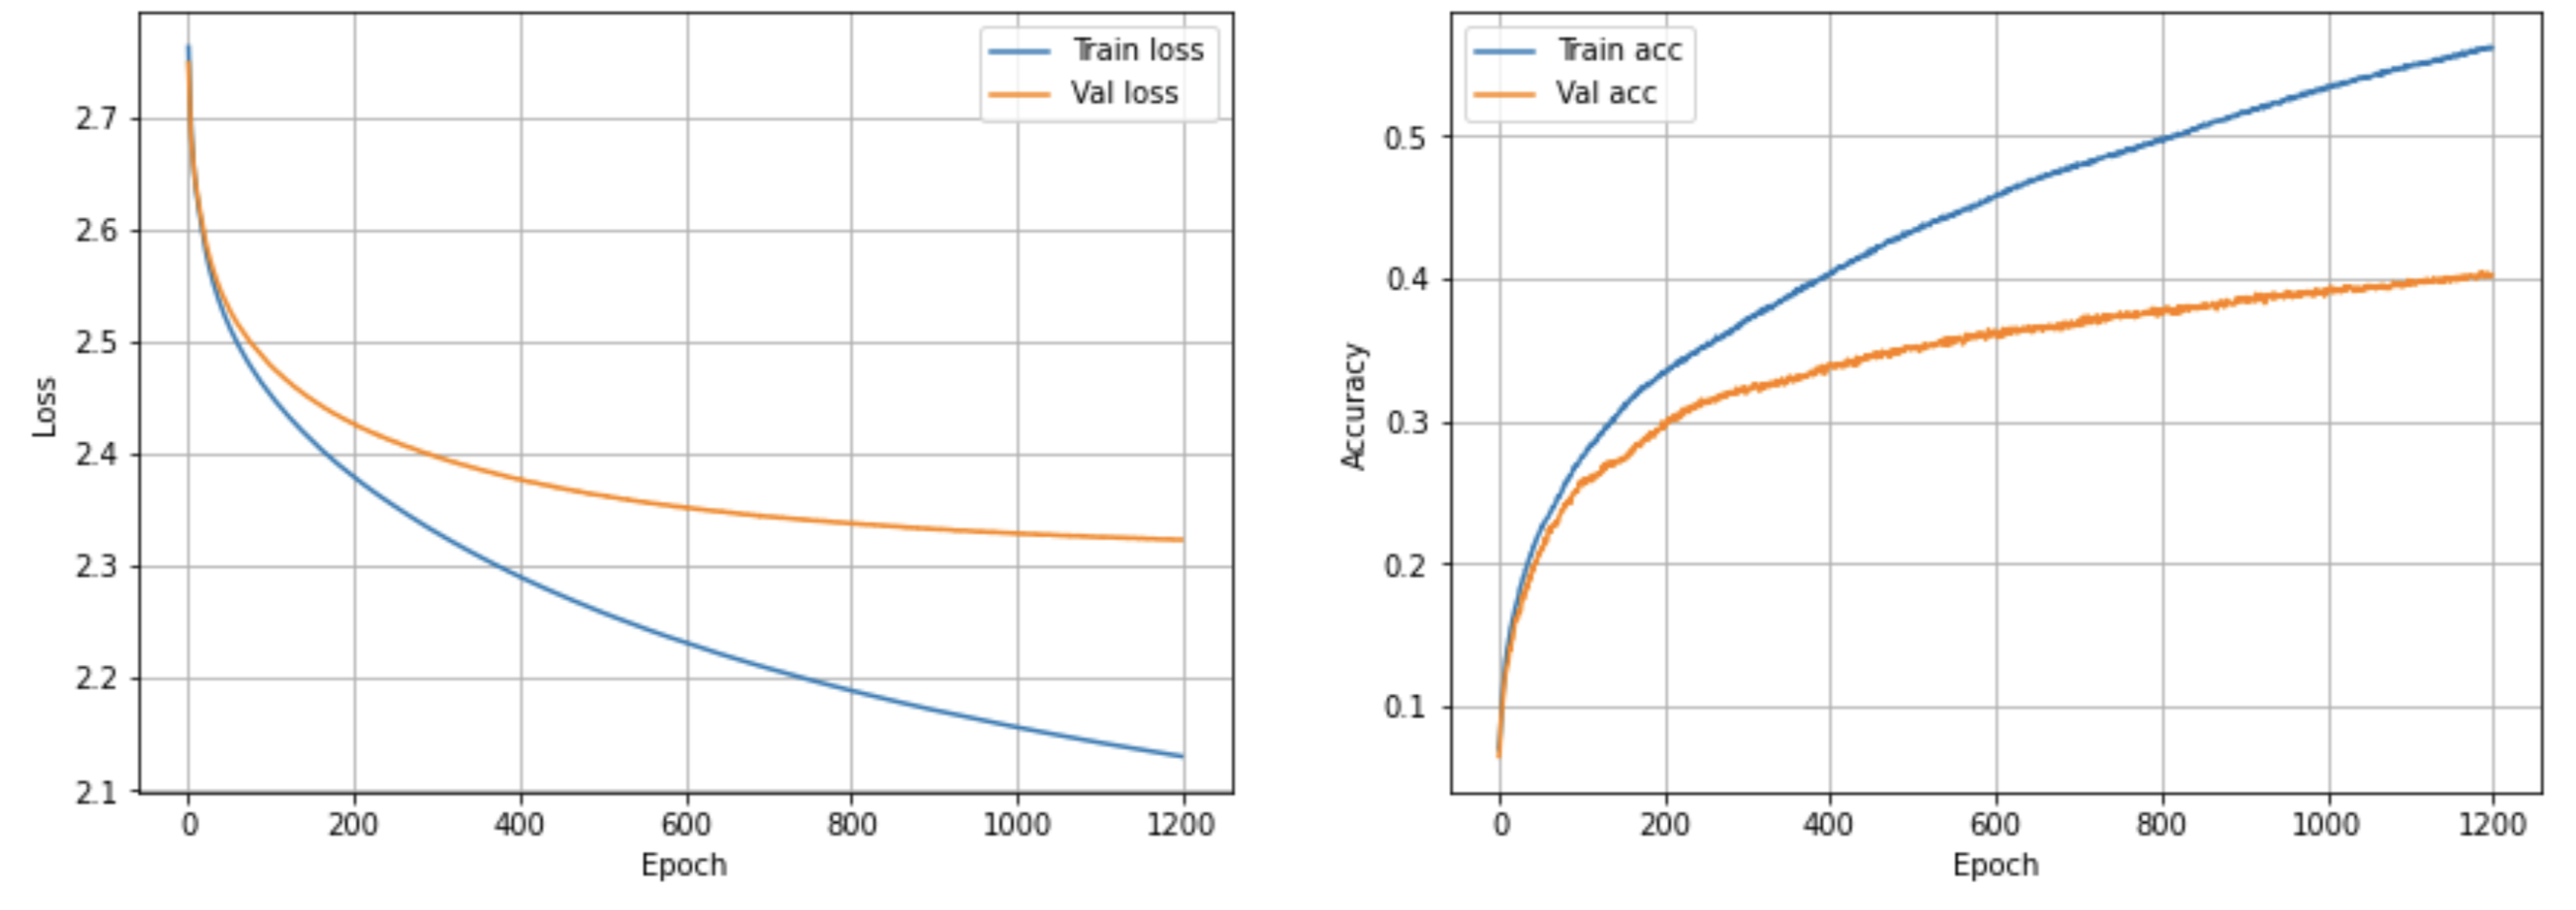

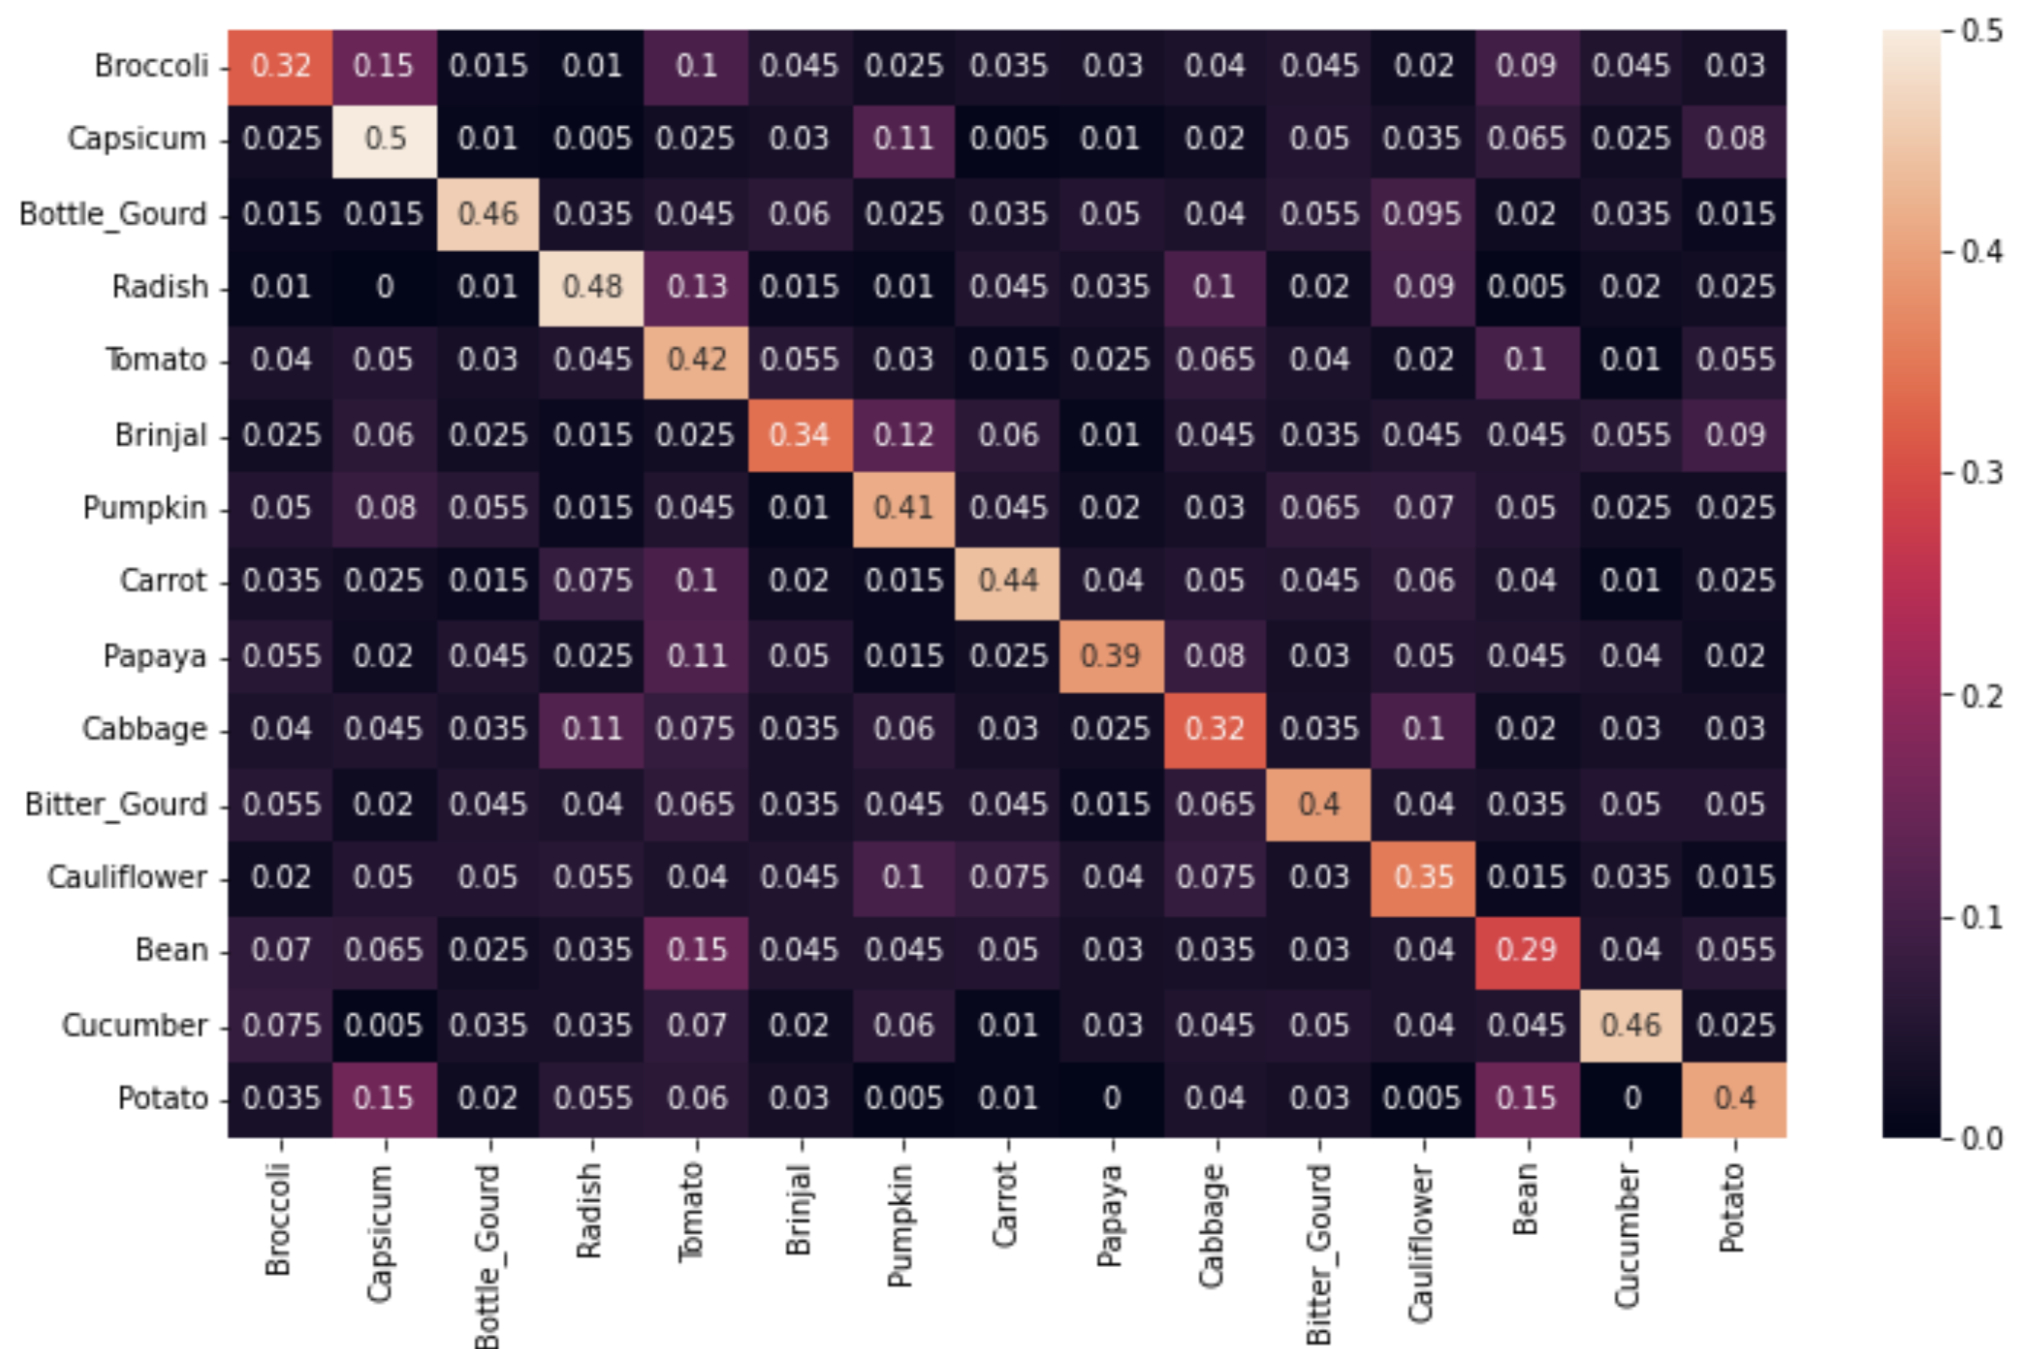

# output when H=1 , Nh=128, batch_size=16, lr=0.007

Epoch 1:  loss = 2.758 , acc = 0.071 , avg_acc = 0.071 ,val_loss = 2.754 ,  val_acc = 0.07 ,avg_val = 0.07  

Epoch 101:  loss = 2.474 , acc = 0.256 , avg_acc = 0.183 ,val_loss = 2.499 ,  val_acc = 0.246 ,avg_val = 0.183  

Epoch 201:  loss = 2.41 , acc = 0.305 , avg_acc = 0.233 ,val_loss = 2.451 ,  val_acc = 0.291 ,avg_val = 0.228  

Epoch 301:  loss = 2.367 , acc = 0.341 , avg_acc = 0.263 ,val_loss = 2.423 ,  val_acc = 0.312 ,avg_val = 0.254  

Epoch 401:  loss = 2.333 , acc = 0.369 , avg_acc = 0.286 ,val_loss = 2.404 ,  val_acc = 0.324 ,avg_val = 0.27  

Epoch 501:  loss = 2.305 , acc = 0.394 , avg_acc = 0.305 ,val_loss = 2.389 ,  val_acc = 0.334 ,avg_val = 0.281  

Epoch 601:  loss = 2.28 , acc = 0.415 , avg_acc = 0.321 ,val_loss = 2.378 ,  val_acc = 0.342 ,avg_val = 0.291  

Epoch 701:  loss = 2.259 , acc = 0.434 , avg_acc = 0.336 ,val_loss = 2.369 ,  val_acc = 0.35 ,avg_val = 0.299  

Epoch 801:  loss = 2.24 , acc = 0.451 , avg_acc = 0.349 ,val_loss = 2.361 ,  val_acc = 0.354 ,avg_val = 0.305  
 
Epoch 901:  loss = 2.223 , acc = 0.467 , avg_acc = 0.362 ,val_loss = 2.356 ,  val_acc = 0.361 ,avg_val = 0.311  

Epoch 1001:  loss = 2.207 , acc = 0.483 , avg_acc = 0.373 ,val_loss = 2.35 ,  val_acc = 0.368 ,avg_val = 0.317  

Epoch 1191:  loss = 2.181 , acc = 0.51 , avg_acc = 0.393 ,val_loss = 2.344 ,  val_acc = 
0.373 ,avg_val = 0.325  

Test accuracy:  0.36133333333333334

recall Broccoli : 0.345

precision Broccoli : 0.3612565445026178

f1 score Broccoli : 0.35294117647058826

recall Capsicum : 0.48

precision Capsicum : 0.36923076923076925

f1 score Capsicum : 0.41739130434782606

recall Bottle_Gourd : 0.285

precision Bottle_Gourd : 0.3904109589041096

f1 score Bottle_Gourd : 0.32947976878612717

recall Radish : 0.46

precision Radish : 0.39148936170212767

f1 score Radish : 0.42298850574712643

recall Tomato : 0.41

precision Tomato : 0.2523076923076923

f1 score Tomato : 0.31238095238095237

recall Brinjal : 0.29

precision Brinjal : 0.29896907216494845

f1 score Brinjal : 0.29441624365482233

recall Pumpkin : 0.325

precision Pumpkin : 0.34946236559139787

f1 score Pumpkin : 0.33678756476683935

recall Carrot : 0.395

precision Carrot : 0.4438202247191011

f1 score Carrot : 0.41798941798941797

recall Papaya : 0.39

precision Papaya : 0.5131578947368421

f1 score Papaya : 0.4431818181818182

recall Cabbage : 0.245

precision Cabbage : 0.2737430167597765

f1 score Cabbage : 0.25857519788918204

recall Bitter_Gourd : 0.355

precision Bitter_Gourd : 0.37967914438502676

f1 score Bitter_Gourd : 0.3669250645994832

recall Cauliflower : 0.39

precision Cauliflower : 0.3277310924369748

f1 score Cauliflower : 0.3561643835616438

recall Bean : 0.26

precision Bean : 0.2694300518134715

f1 score Bean : 0.26463104325699743

recall Cucumber : 0.4

precision Cucumber : 0.5333333333333333

f1 score Cucumber : 0.45714285714285713

recall Potato : 0.39

precision Potato : 0.41935483870967744

f1 score Potato : 0.40414507772020725

recallF : 0.36133333333333334

precisionF : 0.36133333333333334

f1 scoreF : 0.36133333333333334

Test accuracy:  0.36133333333333334



# Results of changing learning rate
After examining results, we see that if the learning rate is too small, training will progress very slowly, because the optimizer will make only small updates to the model weights. This can lead to the model getting stuck in a local minimum, or even failing to converge.
If the learning rate is too large, the optimizer may overshoot the optimal weights and make rapid, erratic updates that can cause the model to diverge.
But, since our learning rate is between 0.005 and 0.02, choosing 0.02 provides us best performance.

# 2 Hidden Layer

# output when H=2 , Nh=128, batch_size=16 lr=0.02

Epoch 1:  loss = 2.749 , acc = 0.071 , avg_acc = 0.071 ,val_loss = 2.727 ,  val_acc = 0.066 ,avg_val = 0.066  
Epoch 11:  loss = 2.597 , acc = 0.174 , avg_acc = 0.088 ,val_loss = 2.608 ,  val_acc = 0.167 ,avg_val = 0.091  
Epoch 21:  loss = 2.536 , acc = 0.224 , avg_acc = 0.145 ,val_loss = 2.559 ,  val_acc = 0.204 ,avg_val = 0.137  
Epoch 31:  loss = 2.502 , acc = 0.251 , avg_acc = 0.176 ,val_loss = 2.53 ,  val_acc = 0.221 ,avg_val = 0.162  
Epoch 41:  loss = 2.477 , acc = 0.268 , avg_acc = 0.196 ,val_loss = 2.511 ,  val_acc = 0.238 ,avg_val = 0.178  
Epoch 51:  loss = 2.457 , acc = 0.285 , avg_acc = 0.212 ,val_loss = 2.497 ,  val_acc = 0.246 ,avg_val = 0.191  
Epoch 61:  loss = 2.439 , acc = 0.299 , avg_acc = 0.226 ,val_loss = 2.484 ,  val_acc = 0.256 ,avg_val = 0.201  
Epoch 71:  loss = 2.423 , acc = 0.314 , avg_acc = 0.237 ,val_loss = 2.474 ,  val_acc = 0.263 ,avg_val = 0.209  
Epoch 81:  loss = 2.407 , acc = 0.326 , avg_acc = 0.247 ,val_loss = 2.465 ,  val_acc = 0.266 ,avg_val = 0.216  
Epoch 91:  loss = 2.383 , acc = 0.335 , avg_acc = 0.257 ,val_loss = 2.446 ,  val_acc = 0.278 ,avg_val = 0.222  
Epoch 101:  loss = 2.364 , acc = 0.352 , avg_acc = 0.265 ,val_loss = 2.433 ,  val_acc = 0.288 ,avg_val = 0.228  
Epoch 111:  loss = 2.349 , acc = 0.363 , avg_acc = 0.274 ,val_loss = 2.424 ,  val_acc = 0.292 ,avg_val = 0.233  
Epoch 121:  loss = 2.335 , acc = 0.374 , avg_acc = 0.282 ,val_loss = 2.415 ,  val_acc = 0.296 ,avg_val = 0.238  
Epoch 131:  loss = 2.323 , acc = 0.385 , avg_acc = 0.289 ,val_loss = 2.408 ,  val_acc = 0.303 ,avg_val = 0.243  
Epoch 141:  loss = 2.311 , acc = 0.391 , avg_acc = 0.296 ,val_loss = 2.402 ,  val_acc = 0.302 ,avg_val = 0.247  
Epoch 151:  loss = 2.299 , acc = 0.402 , avg_acc = 0.303 ,val_loss = 2.396 ,  val_acc = 0.313 ,avg_val = 0.251  
Epoch 161:  loss = 2.289 , acc = 0.408 , avg_acc = 0.309 ,val_loss = 2.389 ,  val_acc = 0.315 ,avg_val = 0.255  
Epoch 171:  loss = 2.279 , acc = 0.418 , avg_acc = 0.315 ,val_loss = 2.385 ,  val_acc = 0.318 ,avg_val = 0.259  
Epoch 181:  loss = 2.269 , acc = 0.426 , avg_acc = 0.321 ,val_loss = 2.381 ,  val_acc = 0.327 ,avg_val = 0.262  
Epoch 191:  loss = 2.26 , acc = 0.432 , avg_acc = 0.327 ,val_loss = 2.376 ,  val_acc = 0.328 ,avg_val = 0.266  
Epoch 201:  loss = 2.251 , acc = 0.441 , avg_acc = 0.332 ,val_loss = 2.372 ,  val_acc = 0.329 ,avg_val = 0.269  
Epoch 211:  loss = 2.243 , acc = 0.447 , avg_acc = 0.338 ,val_loss = 2.368 ,  val_acc = 0.336 ,avg_val = 0.272  
Epoch 221:  loss = 2.235 , acc = 0.454 , avg_acc = 0.343 ,val_loss = 2.364 ,  val_acc = 0.34 ,avg_val = 0.275  
Epoch 231:  loss = 2.227 , acc = 0.461 , avg_acc = 0.348 ,val_loss = 2.361 ,  val_acc = 0.344 ,avg_val = 0.278  
Epoch 241:  loss = 2.22 , acc = 0.467 , avg_acc = 0.353 ,val_loss = 2.358 ,  val_acc = 0.347 ,avg_val = 0.281  
Epoch 251:  loss = 2.213 , acc = 0.474 , avg_acc = 0.357 ,val_loss = 2.355 ,  val_acc = 0.352 ,avg_val = 0.283  
Epoch 261:  loss = 2.206 , acc = 0.478 , avg_acc = 0.362 ,val_loss = 2.352 ,  val_acc = 0.354 ,avg_val = 0.286  
Epoch 271:  loss = 2.199 , acc = 0.484 , avg_acc = 0.366 ,val_loss = 2.35 ,  val_acc = 0.356 ,avg_val = 0.288  
Epoch 281:  loss = 2.193 , acc = 0.49 , avg_acc = 0.371 ,val_loss = 2.347 ,  val_acc = 0.36 ,avg_val = 0.291  
Epoch 291:  loss = 2.187 , acc = 0.497 , avg_acc = 0.375 ,val_loss = 2.346 ,  val_acc = 0.361 ,avg_val = 0.293  
Epoch 301:  loss = 2.181 , acc = 0.501 , avg_acc = 0.379 ,val_loss = 2.345 ,  val_acc = 0.361 ,avg_val = 0.295  
Epoch 311:  loss = 2.176 , acc = 0.506 , avg_acc = 0.383 ,val_loss = 2.342 ,  val_acc = 0.366 ,avg_val = 0.297  
Epoch 321:  loss = 2.17 , acc = 0.509 , avg_acc = 0.387 ,val_loss = 2.341 ,  val_acc = 0.366 ,avg_val = 0.3  
Epoch 331:  loss = 2.165 , acc = 0.515 , avg_acc = 0.391 ,val_loss = 2.338 ,  val_acc = 0.37 ,avg_val = 0.302  
Epoch 341:  loss = 2.16 , acc = 0.519 , avg_acc = 0.394 ,val_loss = 2.338 ,  val_acc = 0.372 ,avg_val = 0.304  
Epoch 351:  loss = 2.155 , acc = 0.524 , avg_acc = 0.398 ,val_loss = 2.336 ,  val_acc = 0.375 ,avg_val = 0.306  
Epoch 361:  loss = 2.15 , acc = 0.529 , avg_acc = 0.402 ,val_loss = 2.334 ,  val_acc = 0.376 ,avg_val = 0.308  
Epoch 371:  loss = 2.146 , acc = 0.532 , avg_acc = 0.405 ,val_loss = 2.333 ,  val_acc = 0.374 ,avg_val = 0.309  
Epoch 381:  loss = 2.141 , acc = 0.536 , avg_acc = 0.408 ,val_loss = 2.331 ,  val_acc = 0.382 ,avg_val = 0.311  
Epoch 391:  loss = 2.137 , acc = 0.541 , avg_acc = 0.412 ,val_loss = 2.331 ,  val_acc = 0.379 ,avg_val = 0.313  
Epoch 401:  loss = 2.133 , acc = 0.545 , avg_acc = 0.415 ,val_loss = 2.33 ,  val_acc = 0.384 ,avg_val = 0.315  
Epoch 411:  loss = 2.129 , acc = 0.548 , avg_acc = 0.418 ,val_loss = 2.329 ,  val_acc = 0.385 ,avg_val = 0.316  
Epoch 421:  loss = 2.125 , acc = 0.552 , avg_acc = 0.421 ,val_loss = 2.328 ,  val_acc = 0.384 ,avg_val = 0.318  
Epoch 431:  loss = 2.122 , acc = 0.556 , avg_acc = 0.424 ,val_loss = 2.327 ,  val_acc = 0.387 ,avg_val = 0.32  
Epoch 441:  loss = 2.118 , acc = 0.559 , avg_acc = 0.427 ,val_loss = 2.327 ,  val_acc = 0.388 ,avg_val = 0.321  
Epoch 451:  loss = 2.114 , acc = 0.562 , avg_acc = 0.43 ,val_loss = 2.327 ,  val_acc = 0.39 ,avg_val = 0.323  
Epoch 461:  loss = 2.111 , acc = 0.567 , avg_acc = 0.433 ,val_loss = 2.326 ,  val_acc = 0.394 ,avg_val = 0.324  
Epoch 471:  loss = 2.108 , acc = 0.57 , avg_acc = 0.436 ,val_loss = 2.326 ,  val_acc = 0.395 ,avg_val = 0.326  
Epoch 481:  loss = 2.105 , acc = 0.573 , avg_acc = 0.439 ,val_loss = 2.324 ,  val_acc = 0.397 ,avg_val = 0.327  
Epoch 491:  loss = 2.102 , acc = 0.576 , avg_acc = 0.442 ,val_loss = 2.325 ,  val_acc = 0.398 ,avg_val = 0.329  
Epoch 501:  loss = 2.099 , acc = 0.58 , avg_acc = 0.445 ,val_loss = 2.325 ,  val_acc = 0.4 ,avg_val = 0.33  
Epoch 511:  loss = 2.096 , acc = 0.581 , avg_acc = 0.447 ,val_loss = 2.323 ,  val_acc = 0.402 ,avg_val = 0.332  
Epoch 521:  loss = 2.093 , acc = 0.584 , avg_acc = 0.45 ,val_loss = 2.323 ,  val_acc = 0.404 ,avg_val = 0.333  
Epoch 531:  loss = 2.09 , acc = 0.588 , avg_acc = 0.452 ,val_loss = 2.323 ,  val_acc = 0.403 ,avg_val = 0.334  
Epoch 541:  loss = 2.088 , acc = 0.591 , avg_acc = 0.455 ,val_loss = 2.323 ,  val_acc = 0.404 ,avg_val = 0.336  
Epoch 551:  loss = 2.085 , acc = 0.592 , avg_acc = 0.457 ,val_loss = 2.322 ,  val_acc = 0.408 ,avg_val = 0.337  
Epoch 561:  loss = 2.083 , acc = 0.595 , avg_acc = 0.46 ,val_loss = 2.322 ,  val_acc = 0.409 ,avg_val = 0.338  
Epoch 571:  loss = 2.08 , acc = 0.599 , avg_acc = 0.462 ,val_loss = 2.321 ,  val_acc = 0.41 ,avg_val = 0.339  
Epoch 581:  loss = 2.078 , acc = 0.601 , avg_acc = 0.465 ,val_loss = 2.322 ,  val_acc = 0.408 ,avg_val = 0.341  
Epoch 591:  loss = 2.076 , acc = 0.604 , avg_acc = 0.467 ,val_loss = 2.321 ,  val_acc = 0.415 ,avg_val = 0.342  
Epoch 601:  loss = 2.074 , acc = 0.606 , avg_acc = 0.469 ,val_loss = 2.321 ,  val_acc = 0.417 ,avg_val = 0.343  
Epoch 611:  loss = 2.072 , acc = 0.609 , avg_acc = 0.472 ,val_loss = 2.32 ,  val_acc = 0.412 ,avg_val = 0.344  
Epoch 621:  loss = 2.069 , acc = 0.611 , avg_acc = 0.474 ,val_loss = 2.321 ,  val_acc = 0.414 ,avg_val = 0.345  
Epoch 631:  loss = 2.067 , acc = 0.614 , avg_acc = 0.476 ,val_loss = 2.32 ,  val_acc = 0.416 ,avg_val = 0.346  
Epoch 641:  loss = 2.065 , acc = 0.615 , avg_acc = 0.478 ,val_loss = 2.319 ,  val_acc = 0.415 ,avg_val = 0.348  
Epoch 651:  loss = 2.063 , acc = 0.617 , avg_acc = 0.48 ,val_loss = 2.32 ,  val_acc = 0.418 ,avg_val = 0.349  
Epoch 661:  loss = 2.062 , acc = 0.618 , avg_acc = 0.482 ,val_loss = 2.321 ,  val_acc = 0.415 ,avg_val = 0.35  
Epoch 671:  loss = 2.06 , acc = 0.621 , avg_acc = 0.484 ,val_loss = 2.32 ,  val_acc = 0.418 ,avg_val = 0.351  
Epoch 681:  loss = 2.058 , acc = 0.622 , avg_acc = 0.486 ,val_loss = 2.321 ,  val_acc = 0.418 ,avg_val = 0.352  
Epoch 691:  loss = 2.056 , acc = 0.626 , avg_acc = 0.488 ,val_loss = 2.32 ,  val_acc = 0.417 ,avg_val = 0.352  
Epoch 701:  loss = 2.055 , acc = 0.627 , avg_acc = 0.49 ,val_loss = 2.32 ,  val_acc = 0.421 ,avg_val = 0.353  
Epoch 711:  loss = 2.053 , acc = 0.629 , avg_acc = 0.492 ,val_loss = 2.321 ,  val_acc = 0.418 ,avg_val = 0.354  
Epoch 721:  loss = 2.051 , acc = 0.63 , avg_acc = 0.494 ,val_loss = 2.32 ,  val_acc = 0.421 ,avg_val = 0.355  
Epoch 731:  loss = 2.05 , acc = 0.633 , avg_acc = 0.496 ,val_loss = 2.32 ,  val_acc = 0.421 ,avg_val = 0.356  
Epoch 741:  loss = 2.049 , acc = 0.635 , avg_acc = 0.498 ,val_loss = 2.32 ,  val_acc = 0.423 ,avg_val = 0.357  
Epoch 751:  loss = 2.047 , acc = 0.637 , avg_acc = 0.5 ,val_loss = 2.321 ,  val_acc = 0.419 ,avg_val = 0.358  
Epoch 761:  loss = 2.046 , acc = 0.639 , avg_acc = 0.502 ,val_loss = 2.321 ,  val_acc = 0.421 ,avg_val = 0.359  
Epoch 771:  loss = 2.044 , acc = 0.64 , avg_acc = 0.503 ,val_loss = 2.32 ,  val_acc = 0.422 ,avg_val = 0.359  
Epoch 781:  loss = 2.043 , acc = 0.642 , avg_acc = 0.505 ,val_loss = 2.321 ,  val_acc = 0.422 ,avg_val = 0.36  
Epoch 791:  loss = 2.042 , acc = 0.644 , avg_acc = 0.507 ,val_loss = 2.321 ,  val_acc = 0.422 ,avg_val = 0.361  
Epoch 801:  loss = 2.04 , acc = 0.645 , avg_acc = 0.509 ,val_loss = 2.322 ,  val_acc = 0.423 ,avg_val = 0.362  
Epoch 811:  loss = 2.039 , acc = 0.646 , avg_acc = 0.51 ,val_loss = 2.321 ,  val_acc = 0.422 ,avg_val = 0.363  
Epoch 821:  loss = 2.038 , acc = 0.649 , avg_acc = 0.512 ,val_loss = 2.321 ,  val_acc = 0.424 ,avg_val = 0.363  
Epoch 831:  loss = 2.037 , acc = 0.65 , avg_acc = 0.514 ,val_loss = 2.321 ,  val_acc = 0.425 ,avg_val = 0.364  
Epoch 841:  loss = 2.036 , acc = 0.651 , avg_acc = 0.515 ,val_loss = 2.322 ,  val_acc = 0.424 ,avg_val = 0.365  
Epoch 851:  loss = 2.034 , acc = 0.652 , avg_acc = 0.517 ,val_loss = 2.322 ,  val_acc = 0.427 ,avg_val = 0.365  
Epoch 861:  loss = 2.033 , acc = 0.654 , avg_acc = 0.518 ,val_loss = 2.321 ,  val_acc = 0.424 ,avg_val = 0.366 
Epoch 871:  loss = 2.032 , acc = 0.655 , avg_acc = 0.52 ,val_loss = 2.322 ,  val_acc = 0.424 ,avg_val = 0.367  
Epoch 881:  loss = 2.031 , acc = 0.657 , avg_acc = 0.522 ,val_loss = 2.321 ,  val_acc = 0.428 ,avg_val = 0.368  
Epoch 891:  loss = 2.03 , acc = 0.659 , avg_acc = 0.523 ,val_loss = 2.321 ,  val_acc = 0.425 ,avg_val = 0.368  
Epoch 901:  loss = 2.029 , acc = 0.659 , avg_acc = 0.525 ,val_loss = 2.322 ,  val_acc = 0.428 ,avg_val = 0.369  
Epoch 911:  loss = 2.028 , acc = 0.66 , avg_acc = 0.526 ,val_loss = 2.322 ,  val_acc = 0.43 ,avg_val = 0.37  
Epoch 921:  loss = 2.027 , acc = 0.663 , avg_acc = 0.528 ,val_loss = 2.323 ,  val_acc = 0.429 ,avg_val = 0.37  
Epoch 931:  loss = 2.026 , acc = 0.664 , avg_acc = 0.529 ,val_loss = 2.322 ,  val_acc = 0.427 ,avg_val = 0.371  
Epoch 941:  loss = 2.025 , acc = 0.665 , avg_acc = 0.53 ,val_loss = 2.322 ,  val_acc = 0.429 ,avg_val = 0.371  
Epoch 951:  loss = 2.024 , acc = 0.666 , avg_acc = 0.532 ,val_loss = 2.322 ,  val_acc = 0.428 ,avg_val = 0.372  
Epoch 961:  loss = 2.023 , acc = 0.668 , avg_acc = 0.533 ,val_loss = 2.322 ,  val_acc = 0.428 ,avg_val = 0.373  
Epoch 971:  loss = 2.022 , acc = 0.669 , avg_acc = 0.535 ,val_loss = 2.322 ,  val_acc = 0.427 ,avg_val = 0.373  
Epoch 981:  loss = 2.021 , acc = 0.669 , avg_acc = 0.536 ,val_loss = 2.322 ,  val_acc = 0.429 ,avg_val = 0.374  
Epoch 991:  loss = 2.021 , acc = 0.672 , avg_acc = 0.537 ,val_loss = 2.323 ,  val_acc = 0.426 ,avg_val = 0.374  
Epoch 1001:  loss = 2.02 , acc = 0.673 , avg_acc = 0.539 ,val_loss = 2.324 ,  val_acc = 0.429 ,avg_val = 0.375  
Epoch 1011:  loss = 2.019 , acc = 0.673 , avg_acc = 0.54 ,val_loss = 2.323 ,  val_acc = 0.427 ,avg_val = 0.375  
Epoch 1021:  loss = 2.018 , acc = 0.675 , avg_acc = 0.541 ,val_loss = 2.323 ,  val_acc = 0.428 ,avg_val = 0.376  
Epoch 1031:  loss = 2.017 , acc = 0.676 , avg_acc = 0.543 ,val_loss = 2.323 ,  val_acc = 0.428 ,avg_val = 0.376  
Epoch 1041:  loss = 2.017 , acc = 0.677 , avg_acc = 0.544 ,val_loss = 2.323 ,  val_acc = 0.429 ,avg_val = 0.377  
Epoch 1051:  loss = 2.016 , acc = 0.677 , avg_acc = 0.545 ,val_loss = 2.324 ,  val_acc = 0.429 ,avg_val = 0.377  
Epoch 1061:  loss = 2.015 , acc = 0.678 , avg_acc = 0.547 ,val_loss = 2.323 ,  val_acc = 0.43 ,avg_val = 0.378  
Epoch 1071:  loss = 2.014 , acc = 0.681 , avg_acc = 0.548 ,val_loss = 2.323 ,  val_acc = 0.43 ,avg_val = 0.378  
Epoch 1081:  loss = 2.014 , acc = 0.681 , avg_acc = 0.549 ,val_loss = 2.324 ,  val_acc = 0.431 ,avg_val = 0.379  
Epoch 1091:  loss = 2.013 , acc = 0.682 , avg_acc = 0.55 ,val_loss = 2.324 ,  val_acc = 0.431 ,avg_val = 0.379

recall Broccoli : 0.37

precision Broccoli : 0.39572192513368987

f1 score Broccoli : 0.38242894056847543

recall Capsicum : 0.51

precision Capsicum : 0.43037974683544306

f1 score Capsicum : 0.4668192219679634

recall Bottle_Gourd : 0.615

precision Bottle_Gourd : 0.6275510204081632

f1 score Bottle_Gourd : 0.6212121212121212

recall Radish : 0.515

precision Radish : 0.4497816593886463

f1 score Radish : 0.4801864801864802

recall Tomato : 0.42

precision Tomato : 0.28378378378378377

f1 score Tomato : 0.3387096774193548

recall Brinjal : 0.345

precision Brinjal : 0.4011627906976744

f1 score Brinjal : 0.3709677419354839

recall Pumpkin : 0.46

precision Pumpkin : 0.42790697674418604

f1 score Pumpkin : 0.4433734939759036

recall Carrot : 0.505

precision Carrot : 0.5024875621890548

f1 score Carrot : 0.5037406483790524

recall Papaya : 0.485

precision Papaya : 0.563953488372093

f1 score Papaya : 0.521505376344086

recall Cabbage : 0.335

precision Cabbage : 0.366120218579235

f1 score Cabbage : 0.34986945169712796

recall Bitter_Gourd : 0.405

precision Bitter_Gourd : 0.44021739130434784

f1 score Bitter_Gourd : 0.421875

recall Cauliflower : 0.38

precision Cauliflower : 0.3958333333333333

f1 score Cauliflower : 0.3877551020408163

recall Bean : 0.26

precision Bean : 0.38235294117647056

f1 score Bean : 0.30952380952380953

recall Cucumber : 0.48

precision Cucumber : 0.5079365079365079

f1 score Cucumber : 0.493573264781491

recall Potato : 0.485

precision Potato : 0.4597156398104265

f1 score Potato : 0.4720194647201946

recallF : 0.438

precisionF : 0.438

f1 scoreF : 0.438

Test accuracy:  0.438


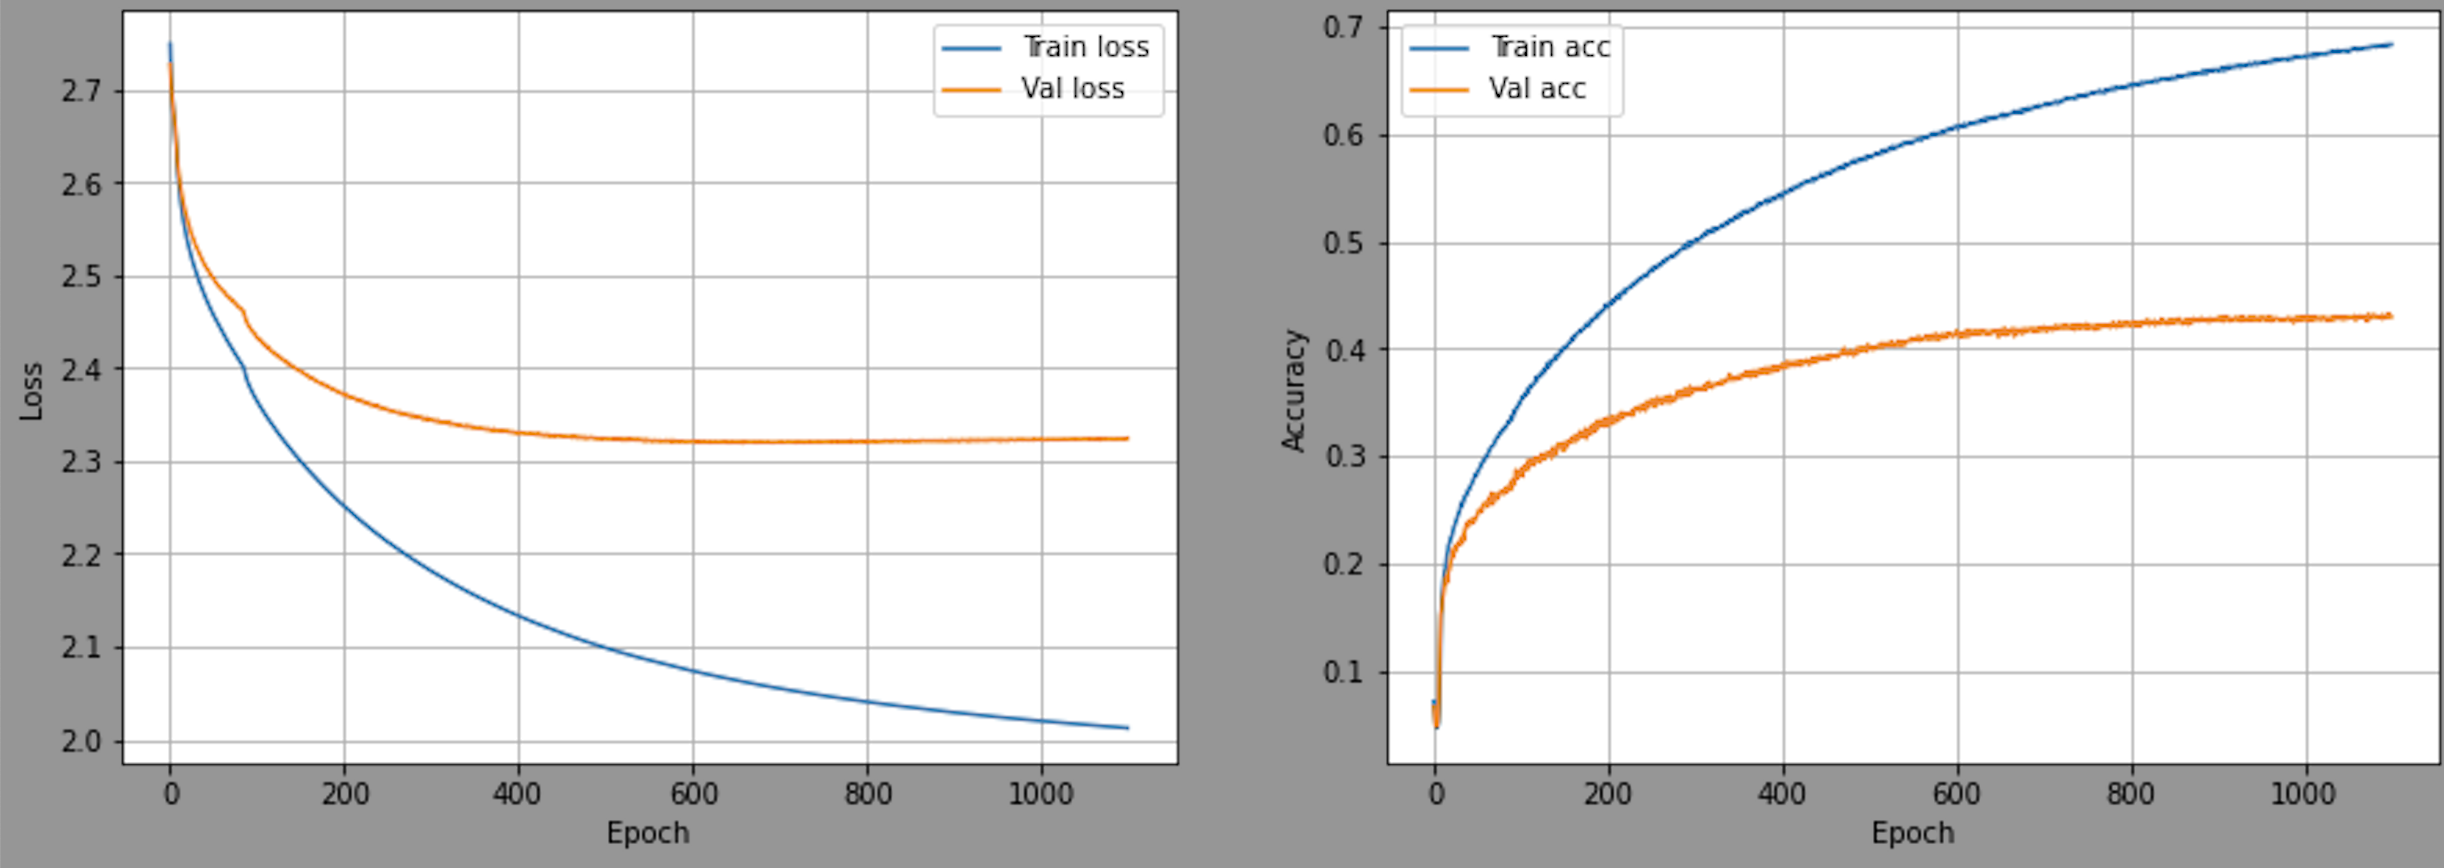

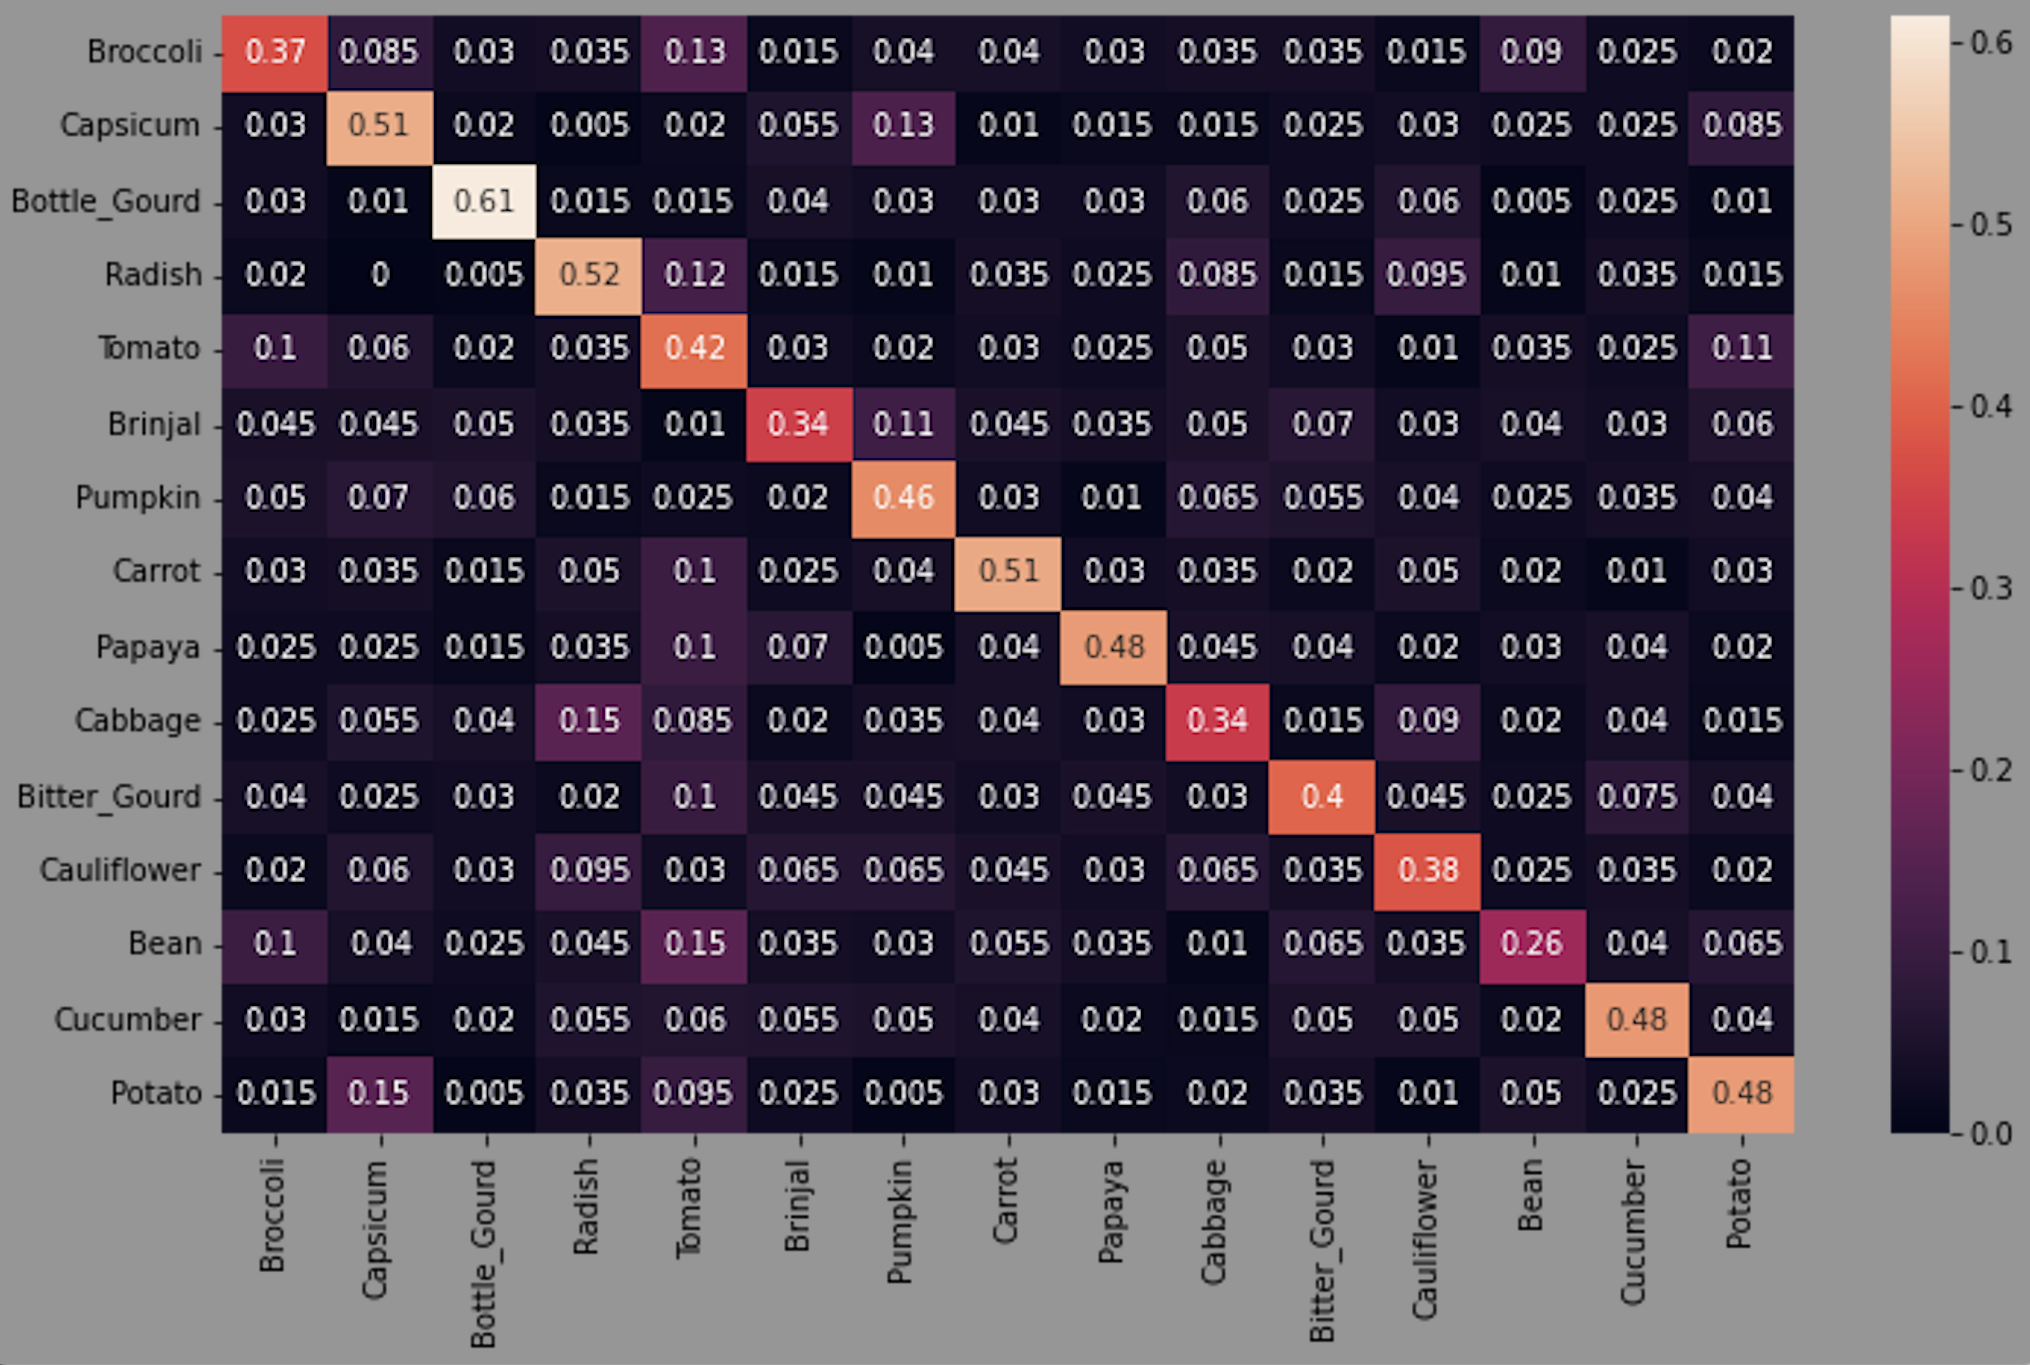

# Results of changing number of hidden layer
We see that the training and test perfomance is better when there are 2 hidden layers. But when hidden layer is 2, the computation speed is slower.